# Proyecto 04 - Informe Final Data Science - Martin Iglesias
Profundiza y ajusta la resolución de tus proyectos: agrega al menos una fuente de datos o prueba un modelo que hasta el momento no hayas aplicado. 

    -Elabora un informe final que describa el proceso de toma de decisiones. 
    -Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. 
    -Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.




## Link en GitHub para este proyecto: https://github.com/SudestadaARG/DATA_SCIENCE-ACAMICA-/proyecto_4

### ¿Por qué la predicción de las Series Temporales?

Decidí elegir esta temática ya que considero que los procesos evolutivos en el tiempo presentan un desafío que viene de antaño y aún hoy es un tema de interés para la academia y el mercado. En este caso particular se presenta un tema adicional que es el impacto de fenómenos externos a la naturaleza de la serie que producen modifiaciones drásticas. 
Ante este escenario, trabajar en este proyecto era darle una oprotunidad de aprender un poco más de cómo hace que una computadora pueda entender y predecir cambios a futuro aún en casos extremos mediante modelos más complejos respecto a los que previamente se vieron.


## ¿Cómo pensé la resolución a este proyecto?

Tal como comenté al final del [Proyecto 3](https://github.com/SudestadaARG/DATA_SCIENCE-ACAMICA-/blob/master/Proyecto3_Series_de_tiempo/DS_Proyecto_03_ST_MartinIglesias.ipynb), mi idea era mejorar el rendimiento de la predicción con otros modelos más complejos. Es apartir de esa meta que este proyecto comienza. 

**Breve resumen**:En el proyecto 3 se tuvo lugar al primer acercamiento del dataset de Flujo vehicular de la ciudad de Buenos Aires mediante un Análisis Exploratorio de Datos y la búsqueda de modelos de Machine Learning para determinar el flujo de vehículos en la autopista Arturo Illia durante el período 2017-2020 (si desea conocer un poco más puede encontrar el mismo en Proyecto 3)

Background: El dataset consiste en un número de variables que los peajes de las autopistas principales de la ciudad de Buenos Aires toman en cuenta para entender la evolución en el tiempo del tráfico vehicular y con ello determinar políticas públicas. Las que se pueden encontrar en este dataset son: 

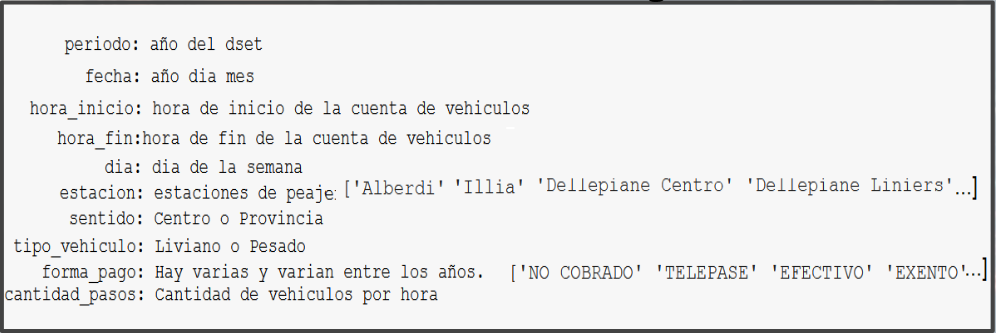



Inicialmente se realizó un análisis exploratorio de los comportamientos principales de la serie, indagando en las componentes tanto la tendencia como la estacionaridad de la serie. Se vio que al descomponer la serie en una parte tendencial y otra estacionaria los modelos tendían a explicar mejor la evolución de la variable en el tiempo en comparación de la serie original.
En la segunda parte, se convirtió en un problema de Machine Learning de predicción a futuro del último trimestre del 2019 y el 2020, el cual este último sufrió un cambio abrupto por un factor externo (cuarentena nacional debido a la pandemia del SAR-COVID-19).


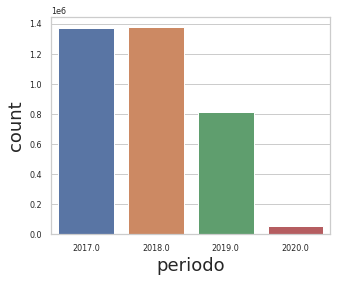


Ambos períodos de predicción tuvieron sus variantes en los modelos utilizados y en términos generales se observó que los modelos tendían a sobreestimar el tráfico bajo y subestimar el tráfico alto. 
Sumado al abrupto cambio en el 2020, los modelos no pudieron capturar el factor externo en la tendencia mas en la estacionaridad algunos comportamientos pudieron mantenerse.


Para lograr mejorar el rendimiento de la predicción futura, pensé en abordar el tema de analizar la serie completa y descompuesta por separado e indagar en nuevos modelos avanzados, especialmente indagando en las redes neuronales LSTM y modelos de que utilizan Gradient Boosting. Como objetivo espero poder capturar el impacto del fenómeno externo con modelos que puedan aprender recursivamente.


# Indice del proyecto:
##Parte A: Organización del dataset y un breve análisis exploratorio
- Cargo todas las librerías para el proyecto completo
- Cargo los dataset (total y descompuesto)
- Pregunta: ¿cuánto es el cambio en el análisis al extraer los datos duplicados descomponiendo y sin descomponer la serie, tuvo algún impacto en las correlaciones?

## Parte B: Modelos de predicción período (Enero-Diciembre 2020)
- Elección de la métrica de evaluación
- Preparación del dataset para modelar (train test Time series)
- Benchmark: Modelo simple, de regresión y el modelo de mejor rendimiento del Proyecto 3. Análisis de sus rendimientos en las tres series.

## Parte C: Modelos de ML avanzados y Neural Network
###Parte 1: Modelos Avanzados de Gradient Boosting
- Elección y elaboración de predicciones con Modelos de Gradient Boosting: LightGBM, SGBM, XGBost.
- Implementación de CrossValidation en Series de tiempo

###Parte 2: Neural Network
- Red neuronal artificial LSTM
- Comparación de métricas de desempeño ante distintas combinaciones Neurales
- Comparación de métricas de desempeño con los modelos y benchmark 

##Parte D: Conclusiones Finales


-------------------
------------------
----------------- 


### Parte A: Organización del dataset y un breve análisis exploratorio



- Cargo todas las librerías para el proyecto completo **(IR completando en el camino y poniendo explicaciones y links en caso necesario)**




In [108]:
#Se importan las librerías y funciones a usar.
%matplotlib inline
#Librerías para realizar operaciones con los datos (numpy),funciones útiles (scipy y math) fechas (datetime), modelos estadisticos para Series de tiempo (statsmodels) y DataFrames(pandas)
import numpy as np
import numpy
import pandas as pd
import datetime
import math
from math import sqrt
from scipy import stats
import itertools
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf


#Librerías de visualización de datos (matplotlib y Seaborn).
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
sns.set(font_scale=1.5, style="white")# Use white grid plot background from seaborn

#Importo libreria de Machine learning
#preprocesamiento
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
#traintest split
from sklearn.model_selection import TimeSeriesSplit #sirve para hacer el train test split de series temporales
#modelos regresivos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor #subsample(subsample interacts with the parameter n_estimators)-->default=1.0 # If smaller than 1.0 this results in "Stochastic Gradient Boosting". 

#Modelos ML de filosofía de Gradient boosting
from lightgbm import LGBMRegressor #Para más informacion visite: https://lightgbm.readthedocs.io/en/latest/
from xgboost import XGBRegressor #Para más información https://xgboost.readthedocs.io/en/latest/


#Metricas de evaluación
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

#Modelo de Red Neuronal
from tensorflow import keras #Para más información visite: https://keras.io/
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM # para más informacion: https://keras.io/api/layers/recurrent_layers/lstm/
!pip install plot_keras_history
from plot_keras_history import plot_history
######################################################
#Extras
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

# Función para convertir un array de valores en una matriz 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return numpy.array(dataX), numpy.array(dataY)
        

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()



def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False,nombreguardado='A'):
    """
    Del artículo https://dzone.com/articles/anomaly-detection-identify-when-currency-crashed
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()
    plt.figure(figsize=(12,3))
  
    plt.title("Moving average (window size = {})".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend",linewidth=0.8)

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond",linewidth=0.5)
        plt.plot(lower_bond, "r--",linewidth=0.5)
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=5)
    
  
    plt.plot(series.index[window:],series.cantidad_pasos[window:], label="Actual values")
    plt.xticks(rotation=30,fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc="best loc", fontsize=10)
    plt.grid(True)

  
def timeseriestraintest(serie,look_back,N_train,N_test):
  """
  Función que permite realizar el train test split acorde de una serie temporal, apartir de la filosofía del lookback (Se usa la idea del ONE-STEP PREDICTION).
  Esta idea es la que se aprendió durante el curso de DS Acámica
  """
  look_back= look_back #definio cuántos valores *hacia atrás* tomaremos.
  #Creamos los `X` e `y` con ceros para luego llenar con los datos. X e y serán sobre los mismos datos sólo que particiono la serie apartir del look back.
  N = serie.shape[0]
  X = np.zeros((N - look_back - 1,look_back))
  y = np.zeros(N - look_back - 1)
  #print(X.shape, y.shape)

  #One-Step Prediction
  #llenamos los datos desde el principio hasta el look back, e y es el dato siguiente al del lookback).
  for i in range(X.shape[0]):
      X[i,:] = serie.iloc[i:i+look_back]
      y[i] = serie.iloc[i+look_back]

  N_train = N_train- look_back # cantidad de instancias que vamos a usar para entrenar. 
  N_test = N_test #cantidad de puntos que vamos a usar para evaluar
  N_total = N_train + N_test
  length_total= N_train + N_test + look_back

  #relleno los datos train y test con mi dataset
  X_train = X[:N_train,:]
  y_train = y[:N_train]
  #print(X_train.shape, y_train.shape)

  X_test = X[N_train:N_train+N_test,:]# (del final del train para adelante)
  y_test = y[N_train:N_train+N_test]
  #print(X_test.shape, y_test.shape)
  print('Observations: %d' % (len(serie)))
  print('Training Observations: %d' % (len(X_train)))
  print('Testing Observations: %d' % (len(X_test)))
  return length_total,X_train,y_train,X_test,y_test,y


def plotSerie(serieoriginal,N_train,look_back, length_total,y_train_pred,y_test_pred,strmodel):
  """
  Función que permite plotear la serie original, los datos train y predichos del problema de forma más ordenada.
  """
  ax=plt.figure(figsize=(10,3))
  plt.plot(serieoriginal.index[:length_total], serieoriginal[:length_total],c='k',alpha=0.9,lw = 1, label = 'Serie Original')
 # plt.plot(serieoriginal.index[:N_train + look_back], serieoriginal[:N_train + look_back],'--', label = 'Usado para entrenar')
  plt.plot(serieoriginal.index[look_back:  N_train], y_train_pred,'-.',c='r',)#label = 'Predicho en Train')
  plt.plot(serieoriginal.index[N_train: length_total], y_test_pred,'-.', lw = 2,c='g', label = 'Predicho en Test')
  plt.legend(loc='best', fontsize=8)
  plt.xticks(rotation=30,fontsize=10)
  plt.yticks(fontsize=10)
  plt.xlim(serieoriginal.index[N_train], serieoriginal.index[length_total])
  ax.text(0, 1, r'Modelo:'+strmodel, fontsize=15)
  plt.xlabel('Dia')
  plt.ylabel('cantidad de\nvehiculos por dia', fontsize=10)
  plt.title('Predicción (One Step Prediction) ') 


def MetricasSerie(y_train,y_test,y_train_pred,y_test_pred,modelo):
  #metricas de evaluación en TRAIN y TEST 
    if modelo=='Benchmark':
     MAE_test=mean_absolute_error(y_test, y_test_pred)
     MSE_test=mean_squared_error(y_test, y_test_pred)
     RMSE_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
     R2_test=r2_score(y_test, y_test_pred)
     SCORES=[modelo,np.nan,MAE_test,np.nan,MSE_test,np.nan,RMSE_test,np.nan,R2_test]
    else:
     MAE_train=mean_absolute_error(y_train, y_train_pred)
     MAE_test=mean_absolute_error(y_test, y_test_pred)
     MSE_train=mean_squared_error(y_train, y_train_pred)
     MSE_test=mean_squared_error(y_test, y_test_pred)
     RMSE_train=np.sqrt(mean_squared_error(y_train, y_train_pred))
     RMSE_test=np.sqrt(mean_squared_error(y_test, y_test_pred))
     R2_train=r2_score(y_train, y_train_pred)
     R2_test=r2_score(y_test, y_test_pred)
     SCORES=[modelo,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test,R2_train,R2_test]  
    return SCORES


def evaluar_model(model, X_train, X_test, y_train, y_test,modelo_a_evaluar='A'):
    """
    Función que devuelve métricas de rendimiento y un gráfico de dispersión sobre el desempeño del modelo respecto a datos reales.
    """
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ### GRAFICAMOS la de dispersión de y_test vs y_predic_test y el histograma de distribución de errores(generados por el modelo a partir de los datos dev)
    #Si el modelo de regresión es bueno, cerca de que curva deberían estar los puntos. indicando un buen ajuste.
    fig=plt.figure(figsize = (4,4))
    ax = plt.subplot(1,1,1)
    ax.scatter(y_test,y_test_pred, s =2)
    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title(modelo_a_evaluar)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig.patch.set_facecolor('xkcd:white')

    plt.tight_layout()
    #plt.savefig(path+'YpredvsYreal'+modelo_a_evaluar,facecolor='xkcd:white')
    plt.show()

    #RMSE en TRAIN y TEST 
    print('Error RMSE en datos de train:',round(np.sqrt(mean_squared_error(y_train, y_train_pred)),4))
    print('Error RMSE en datos de test:',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
    #R2 en TRAIN y TEST
    print('Error R2 en datos de train:',round(r2_score(y_train, y_train_pred),5)) 
    print('Error R2 en datos de test:',round(r2_score(y_test, y_test_pred),5))


def ChainingTS(serie,n_splits,model_sin_fitear,tiposerie):
  """
  Función diseñada para realizar la crosvalidación en series de tiempo con filosofía Chaining Foward. Devuelve métricas de rendiemiento
  Chaining forward cross validation: the train set expanding each time step and the test set fixed at one time step ahead.
  
  Puedes encontrar aquí más información sobre el chaining foward https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9
  https://robjhyndman.com/hyndsight/tscv/      https://otexts.com/fpp3/tscv.html     https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/
  We will store the root mean squared error of the prediction in the “rmse” array. After the last test, we will calculate the average error.

  n_splits es: el número de partición de la serie 
  model_sin_fitear: es aquel donde uno ya realiza el model.fit(X_train,y_train)con los parámetros que uno elige.
  tiposerie: es la serie con que estoy trabajando (total o descompuesta)
  """
  tscv = TimeSeriesSplit(n_splits = n_splits) #utilizo esta librería para hacer la partición en la serie de tiempo
  rmsetrain = []
  r2train = []
  rmsetest = []
  r2test = []

  for train_index, test_index in tscv.split(serie):
      cv_train, cv_test = serie.iloc[train_index], serie.iloc[test_index]  
      X_train, X_test = pd.DataFrame(serie[train_index]), pd.DataFrame(serie[test_index])
      y_train, y_test = pd.DataFrame(serie[train_index]), pd.DataFrame(serie[test_index])


      #debo escalarlos
      from sklearn.preprocessing import RobustScaler
      scaler = RobustScaler(quantile_range=(25, 75))
      X_train_sc= pd.DataFrame(scaler.fit_transform(X_train.values.reshape(-1,1))) #es importante notar que al hacer el escalado lo que devuelve es un array, por lo que se vuelve a transformar en DataFrame para manipular los datos de forma más ordenada.
      X_test_sc= pd.DataFrame(scaler.transform(X_test)) #son instancias que supongo que vendran despues y no los escalos.
 
      #Entreno el modelo y predigo
      model = model_sin_fitear.fit(X_train_sc,y_train)
      performance= model.predict(X_train_sc)
      train_values=cv_train.values
   
      predictions = model.predict(X_test_sc)
      true_values = cv_test.values

      rmsetrain.append(sqrt(mean_squared_error(train_values, performance)))
      r2train.append(r2_score(train_values, performance))
      
      rmsetest.append(sqrt(mean_squared_error(true_values, predictions)))
      r2test.append(r2_score(true_values, predictions))
  print(str(tiposerie)+" MEAN RMSE test: {0:.2f}".format(np.mean(rmsetest)))
  print(str(tiposerie)+" STD RMSE test: {0:.2f}".format(np.std(rmsetest)))
  print(str(tiposerie)+" MEAN R2 test: {0:.2f}".format(np.mean(r2test)))
  print(str(tiposerie)+" STD R2 test: {0:.2f}".format(np.std(r2test)))
  return rmsetrain,r2train,rmsetest,r2test
     

def plotCV_TS(n_split,rmsetrain,r2train,rmsetest,r2test,model,Serie):
  """
  Grafica la evolución del RMSE y R2 en función de las particiones realizadas a la serie en el Chaining foward CV
  """ 
  print('')
  print('')
  print('')
     
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  plt.plot(np.arange(1,n_splits+1),rmsetrain,marker='o',label='Train')
  plt.plot(np.arange(1,n_splits+1),rmsetest,marker='o',label='Test')
  plt.legend(loc='bestloc')
  plt.ylabel('RMSE')
  plt.xlabel('N° split')
  plt.title('RMSE en función de paso\n ChainingFoward Para el modelo\n '+str(model)+' para '+str(Serie))

  plt.subplot(1,2,2)
  plt.plot(np.arange(1,n_splits+1),r2train,marker='o',label='Train')
  plt.plot(np.arange(1,n_splits+1),r2test,marker='o',label='Test')
  plt.legend(loc='bestloc')
  plt.ylabel('R2')
  plt.xlabel('N° split')
  plt.title('R2 en función de paso\n ChainingFoward Para el modelo\n '+str(model)+' para '+str(Serie))
  plt.tight_layout()

        

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Cargo los dataset (total y descompuesto)
  - Dataset: Flujo Vehicular por Unidades de Peaje AUSA
    
    **Puede encontrar el dataset total [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa).Se utilizan los años 2017, 2018, 2019 y 2020.**  
    **Sin embargo los dataset que se cargan acontinuacion provienen del  [Proyecto 3](https://github.com/SudestadaARG/DATA_SCIENCE-ACAMICA-/blob/master/Proyecto3_Series_de_tiempo/DS_Proyecto_03_ST_MartinIglesias.ipynb), donde ya estan procesados.** 


**Importante:**  Para el proyecto se analizan los datos de la autopista Illia, pago en Efectivo. Acorde al proyecto 3.



In [109]:
#Cargo los dataset (en este caso primero se cargan del 2017-2019 porque tienen el mismo formato, en el 2020 cambió y por ello se modifica más abajo)
data_2019 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto3/Datasets/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto3/Datasets/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto3/Datasets/flujo-vehicular-2017.csv', sep =',')

#Genero la serie
dataset = pd.concat([data_2019, data_2018,data_2017])
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset1 = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset1.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset1['fecha2'] = pd.to_datetime(dataset1.fecha) + pd.to_timedelta(dataset1.hora_fin, unit = 'h')
#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset1.drop(columns=['fecha','hora_fin'], inplace = True)
#Corregimos el nombre de fecha2 a fecha
dataset1.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#Reordenamos el dataset por fecha
dataset1.sort_values('fecha', inplace = True)
dataset1.reset_index(drop=True, inplace = True)

#en este caso concateno el dataset 2020 luego porque el csv presentaba otra estructura que primero tuvo que organizarse.
data_2020 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto3/Datasets/flujo-vehicular-2020.csv', sep =',')
mask = np.logical_and(data_2020.estacion=='ILLIA', data_2020.forma_pago == 'Efectivo')
data_2020 = data_2020[mask]
data_2020bis = data_2020[['dia','sentido','tipo_vehiculo','cantidad_pasos','fecha','periodo','forma_pago','estacion']]

dataset2 = pd.concat([data_2020bis,dataset1[::-1]])#el [::-1] es para ordenar los indices de menor a mayor para que quede ordenado cronológicamente.
dataset2=dataset2[['fecha','cantidad_pasos']]
dataset2['fecha'] = pd.to_datetime(dataset2['fecha'])


###Breve análisis exploratorio

* Pregunta: ¿cuánto es el cambio en el análisis al extraer los datos duplicados descomponiendo y sin descomponer la serie, tuvo algún impacto en las correlaciones?


El dataset original cuenta un total de datos (fila,columna) de:  (291243, 2)
El dataset original cuenta un total de datos duplicados en (fila,columna) de:  (71869, 2) representa el  0.2468 % del total
Serie con duplicados


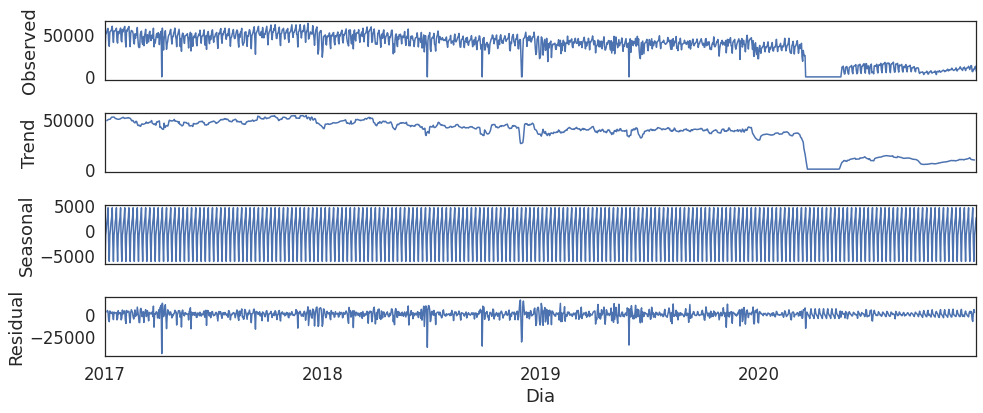

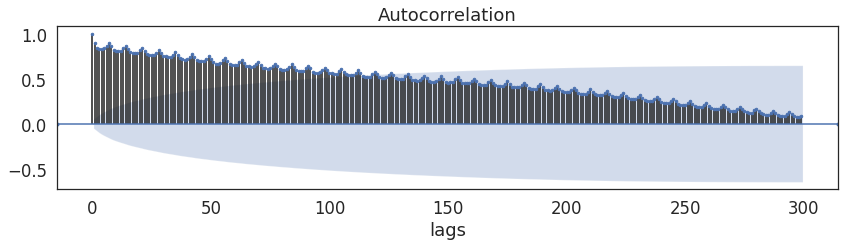





Serie sin duplicados


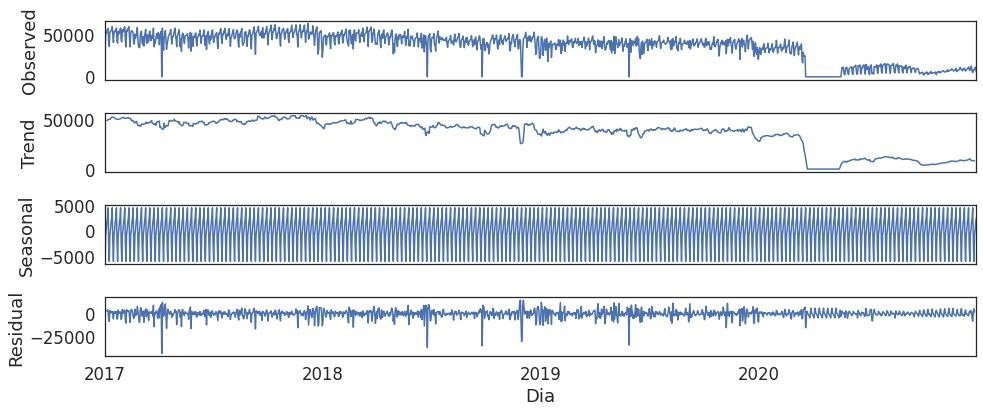

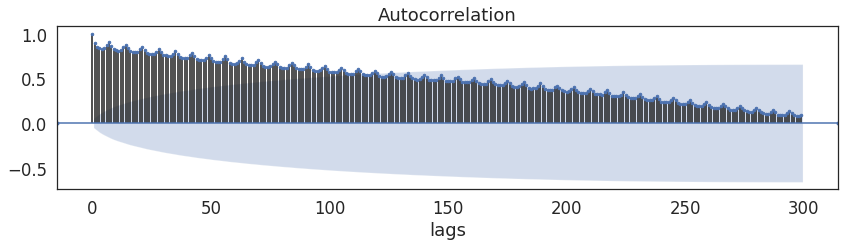

In [110]:
#observamos los datos duplicados, para ver si hay algun cambio llamativo en las series descompuestas en las autocorrelaciones previo a modelarlos.
print('El dataset original cuenta un total de datos (fila,columna) de: ',dataset2.shape)
print('El dataset original cuenta un total de datos duplicados en (fila,columna) de: ',dataset2[dataset2.duplicated()].shape, 'representa el ',round((dataset2[dataset2.duplicated()].shape)[0]/(dataset2.shape)[0],4),'% del total')

#Genero mi dataset resampleado en datos diarios con el que se va a trabajar (inicialmente son horarios)
dataset_total_D = dataset2.resample('D', on='fecha').sum() 
#se descompone a la serie en una componente Tendencial, Estacional y Residual
result_adi = seasonal_decompose(dataset_total_D.cantidad_pasos, model='additive') #usa un modelo adaptativo por como se estudia la estacionanlidad
print('Serie con duplicados')
matplotlib.rcParams['figure.figsize'] = [14,6]
result_adi.plot()
plt.xlabel('Dia')
plt.show()
nlags=300
matplotlib.rcParams['figure.figsize'] = [14,3]
plot_acf(dataset_total_D.cantidad_pasos, lags =np.arange(nlags),use_vlines=True,marker='.')
plt.xlabel('lags')
plt.show()
print()
print()
print()
print()

#Ahora extraigo los duplicados
dataset2=dataset2.drop_duplicates()
dataset_total_D = dataset2.resample('D', on='fecha').sum() #Genero mi dataset resampleado en datos diarios (inicialmente son horarios)
#se descompone a la serie en una componente Tendencial, Estacional y Residual
result_adi = seasonal_decompose(dataset_total_D.cantidad_pasos, model='additive') #usa un modelo adaptativo por como se estudia la estacionanlidad
print('Serie sin duplicados')
matplotlib.rcParams['figure.figsize'] = [14,6]
result_adi.plot()
plt.xlabel('Dia')
plt.show()

matplotlib.rcParams['figure.figsize'] = [14,3]
plot_acf(dataset_total_D.cantidad_pasos, lags =np.arange(nlags),use_vlines=True,marker='.')
plt.xlabel('lags')
plt.show()



En términos generales, dado que los elementos duplicados son menos del 0,5% no hay cambios significativos en cada elemento de la serie y en las autocorrelaciones, por lo que remover los duplicados no impactaría en los modelos a realizar. Aún así uno debe ser conciente de la existencia de este tipo de datos para poder generar una ingesta de datos coherente.


In [111]:
#Genero mi dataset descompuesto en tendencia y estacionario a partir de mis datos sin duplicados.
#Por lo visto en el proyecto 3 se observó que aplicar una descomposición de un modelo aditivo era más coherente a los datos presentes por lo que se aplicará esa descomposición aquí para estar ante las mismas condiciones y poder comparar con lo encontrado antes.

#se descompone a la serie en una componente Tendencial, Estacional y Residual
result_adi = seasonal_decompose(dataset_total_D.cantidad_pasos, model='additive') #usa un modelo adaptativo por como se estudia la estacionanlidad

#Tomo la tendencia y la serie estacional
dataset_trend = pd.DataFrame(result_adi.trend).dropna()
dataset_wOut_trend = pd.DataFrame(dataset_total_D-dataset_trend).dropna()


Text(0, 0.5, 'Cantidad de vehículos por día')

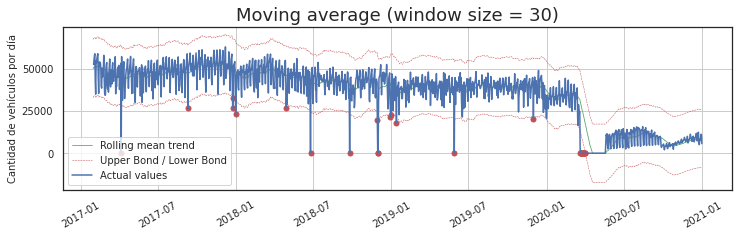

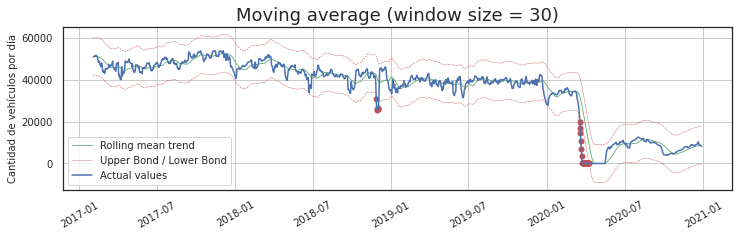

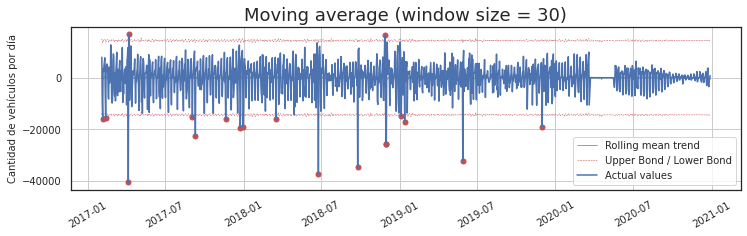

In [112]:
#grafico las tres series (total, tendencia y estacionaldidad). se observan los outliers.
plotMovingAverage(dataset_total_D, 30, plot_intervals=True, scale=1.96, plot_anomalies=True,nombreguardado='seriecompleta')
plt.ylabel('Cantidad de vehículos por día',fontsize=10)


plotMovingAverage(dataset_trend, 30, plot_intervals=True, scale=1.96, plot_anomalies=True,nombreguardado='seriecompleta')
plt.ylabel('Cantidad de vehículos por día',fontsize=10)

plotMovingAverage(dataset_wOut_trend, 30, plot_intervals=True, scale=1.96, plot_anomalies=True,nombreguardado='seriecompleta')
plt.ylabel('Cantidad de vehículos por día',fontsize=10)

Como observamos en las tres series los datos que sobrepasan el umbral de tolerancia se los considera outliers de la serie. En este caso, y como se explicó en el proyecto 3, se tratan de datos "naturales". Es decir, que tienen un correlato en la realidad y que se evidenciaron en los periódicos locales. La mayoría se deben a cortes de ruta o manifestaciones, mientras que otros como los casos positivos que se observa en la serie sin tendencia se deben a un aumento repentino del flujo vehicular por mayor afluencia de vehículos hacia o desde Capital Federal por días de descanso o fiestas.
Debido a que son considerados "naturales" he resuelto no remover dichos datos con el objetivo de poder predecir posibles cambios drasticos por parte de los modelos y ayudarlo a enseñar al modelo ante cambios rápidos para futuros comportamientos.

-----------------
-----------------



## Parte B: Modelos de predicción período (Enero-Diciembre 2020)
- Elección de la métrica de evaluación



En función de este artículo se proponene las 
[métricas de evaluación asociadas al análisis de regresión tipicas en un analisis de serie de tiempo](https://joydeep31415.medium.com/common-metrics-for-time-series-analysis-f3ca4b29fe42).

**Mean Absolute Error (MAE)**

El error absoluto medio es la media de los valores absolutos de la desviación. Este tipo de medición del error es útil cuando se miden los errores de predicción en la misma unidad que la serie original.

    -Éste indicará el error medio que puede esperar de la previsión.
    -Es bastante resistente a los valores atípicos. Por lo tanto, el MAE es útil si los datos de entrenamiento están contaminados con valores atípicos y hay grandes valores positivos/negativos en nuestros datos que creemos que podrían no ser el caso en el futuro. 
    -Es buena esta medida de error para comparar entre diferentes modelos.



**Mean Squared Error (MSE)**


El error medio al cuadrado es la media del cuadrado del error de previsión.

    -Como se toma el cuadrado de los errores, el efecto es que los errores más grandes tienen más peso en la puntuación.
    -Tiene la ventaja de estar en la misma unidad que la variable de previsión.
    -Además, como tanto el MSE como el RMSE toman el cuadrado de los errores, los valores atípicos tendrán un gran efecto en el error resultante.

**Raíz del error cuadrático medio (RMSE)**
    
    -Es la métrica más comúnmente utilizada para las tareas de regresión y representa a la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el valor pronosticado. Indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. 
    -Tiene la propiedad útil de estar en las mismas unidades que la variable de respuesta.
    -RMSE es una buena medida de la precisión con que el modelo predice la respuesta, y es el criterio más importante para ajustar si el propósito principal del modelo es la predicción.
    -Los valores más bajos de RMSE indican un mejor ajuste. 
    -Tiene sus limitaciones: El error es una variable aleatoria numérica y no se puede captar todo el comportamiento de una variable aleatoria con una sola agregación de observaciones. El error es solo una variable aleatoria, a menudo es una variable aleatoria muy sesgada. Cuando predecimos resultados sesgados, como precios, ingresos, ventas de artículos y muchos más, lo más probable es que el error también sea sesgado, lo que significa que en la mayoría de los casos el error es muy pequeño, pero hay relativamente pocos ejemplos que pueden tener errores extremadamente grandes. Cuando el error es muy sesgado, el promedio a menudo no dice nada.


**Coeficiente de determinación R²**

    -Determina la capacidad de un modelo para predecir futuros resultados. Es decir, la calidad del modelo para replicar los resultados y la proporción de variación de los resultados que puede explicarse por el modelo.
    -El mejor resultado posible es 1, y ocurre cuando la predicción coincide con los valores de la variable objetivo. R2 puede tomar valores negativos pues la predicción puede ser arbitrariamente mala. Cuando la predicción coincide con la esperanza de los valores de la variable objetivo, el resultado de R2 es 0. Se define como 1 menos la suma de cuadrados totales dividido por la suma de cuadrados de los residuos.
    -Esta estimación de la predictividad puede ser optimista o pesimista en comparación con la verdadera predicción prospectiva, dependiendo de cómo se seleccionen los compuestos en el conjunto de pruebas.

En este caso se usarán las métricas que presenta la librería [Scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

- Preparación del dataset para modelar (train test Time series)

In [113]:
#Primero train test split simple(para saber el porcentaje de observaciones train y test. luego procedo con un metodo de one step)

#Serie total
X_tot = dataset_total_D.squeeze()  #el .squeeze() es porque necesito un imput en forma de serie para funcion timeseriestraintest
train_size = int(len(X_tot) * 0.75) #<--- con la serie del 2017-2019 el train con el  0.75 de los datos deja al test con el 2020
test_size=1-int(len(X_tot) * 0.75) 
train_tot, test_tot = X_tot[0:train_size], X_tot[train_size:len(X_tot)]

#Serie trend
X_t = dataset_trend.squeeze()
train_size = int(len(X_t) * 0.75) 
test_size=1-int(len(X_t) * 0.75) 
train_t, test_t = X_t[0:train_size], X_t[train_size:len(X_t)]


#Serie sin tendencia
X_wOt = dataset_wOut_trend.squeeze()
train_size = int(len(X_wOt) * 0.75) 
test_size=1-int(len(X_wOt) * 0.75) 
train_wOt, test_wOt = X_wOt[0:train_size], X_wOt[train_size:len(X_wOt)]


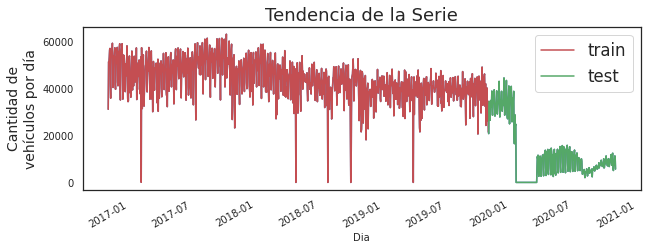

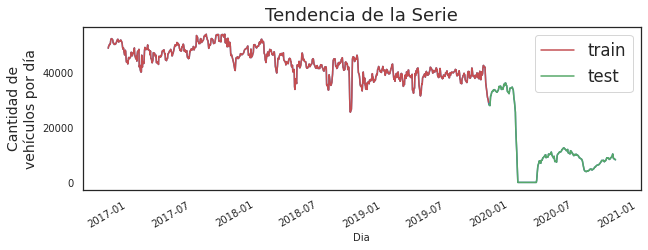

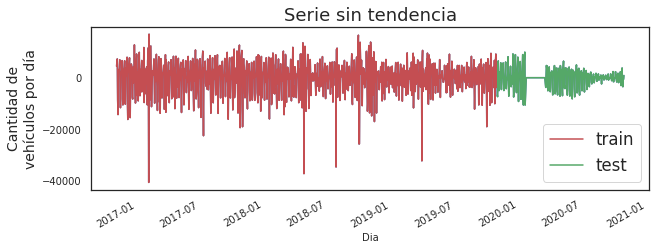

In [114]:
#Observo cómo es la división train test
#Serie total
plt.figure(figsize=(10,3))
plt.plot(X_tot)
plt.plot(train_tot,c='r',label='train')
plt.plot(test_tot,c='g',label='test')
plt.legend()
plt.xticks(rotation=30,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Tendencia de la Serie')
plt.xlabel('Dia',fontsize=10)
plt.ylabel('Cantidad de\nvehículos por día',fontsize=14)
plt.show()

#Tendencia de la serie
plt.figure(figsize=(10,3))
plt.plot(X_t)
plt.plot(train_t,c='r',label='train')
plt.plot(test_t,c='g',label='test')
plt.legend()
plt.xticks(rotation=30,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Tendencia de la Serie')
plt.xlabel('Dia',fontsize=10)
plt.ylabel('Cantidad de\nvehículos por día',fontsize=14)
plt.show()

#Serie sin tendencia
plt.figure(figsize=(10,3))
plt.plot(X_wOt)
plt.plot(train_wOt,c='r',label='train')
plt.plot(test_wOt,c='g',label='test')
plt.legend()
plt.xticks(rotation=30,fontsize=10)
plt.yticks(fontsize=10)
plt.title('Serie sin tendencia')
plt.ylabel('Cantidad de\nvehículos por día',fontsize=14)
plt.xlabel('Dia',fontsize=10)
plt.show()



In [115]:
#se tiene Training Observations 1091 y Testing Observations 364, este último considera el último año.
#inicialmente considero un lookback de 300 días por lo observado en la correlación en el autocorrelograma
look_back=300 #cuanto del inicio de la serie tomo datos para entrenar mis modelos. Cuanto mayor el look_back más datos del "presente" uso
N_train=1091 #resto de dias de los dos años
N_test=364 #tres meses 

#Aplico la función del split
length_total_tot,X_tot_train,y_tot_train,X_tot_test,y_tot_test,y_tot= timeseriestraintest(X_tot,look_back,N_train,N_test)
length_total_tend,X_tend_train,y_tend_train,X_tend_test,y_tend_test,y_tend= timeseriestraintest(X_t,look_back,N_train,N_test)
length_total_wOt,X_wOt_train,y_wOt_train,X_wOt_test,y_wOt_test,y_wOt= timeseriestraintest(X_wOt,look_back,N_train,N_test)


Observations: 1461
Training Observations: 791
Testing Observations: 364
Observations: 1455
Training Observations: 791
Testing Observations: 363
Observations: 1455
Training Observations: 791
Testing Observations: 363


In [116]:
#Realizo un escalado de los datos
scaler = RobustScaler(quantile_range=(25, 75))  #es importante notar que al hacer el escalado lo que devuelve es un array, por lo que se vuelve a transformar en DataFrame para manipular los datos de forma más ordenada.

#serie total
X_tot_train_sc= pd.DataFrame(scaler.fit_transform(X_tot_train)) 
X_tot_test_sc= pd.DataFrame(scaler.transform(X_tot_test)) #los datos test son instancias que supongo que vendran despues y no los escalos.

#tendencia de la serie
X_tend_train_sc= pd.DataFrame(scaler.fit_transform(X_tend_train)) 
X_tend_test_sc= pd.DataFrame(scaler.transform(X_tend_test)) 

#serie sin tendencia
X_wOt_train_sc= pd.DataFrame(scaler.fit_transform(X_wOt_train)) 
X_wOt_test_sc= pd.DataFrame(scaler.transform(X_wOt_test))


* Benchmark: Modelo simple, de regresión y el modelo de mejor rendimiento del Proyecto 3. Análisis de sus rendimientos en las tres series.


In [117]:
#LinearRegresion (modelo simple)
L_tot= LinearRegression().fit(X_tot_train_sc, y_tot_train)
L_t= LinearRegression().fit(X_tend_train_sc, y_tend_train)
L_wOt= LinearRegression().fit(X_wOt_train_sc, y_wOt_train)

#Adaboost regressor optimizado
#en este caso elijo los parametros optimizados tanto para el caso de tendencia y sin tendencia. El caso de Serie total usaré los parámetros de la tendencia.
Ada_tot = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,learning_rate= 0.01,loss= 'exponential', random_state=42).fit(X_tot_train_sc, y_tot_train)
Ada_t = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=400,learning_rate= 0.01,loss= 'exponential', random_state=42).fit(X_tend_train_sc, y_tend_train)
Ada_wOt = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=50, learning_rate= 0.5,loss= 'exponential',random_state=42).fit(X_wOt_train_sc, y_wOt_train)

<Figure size 1008x216 with 0 Axes>

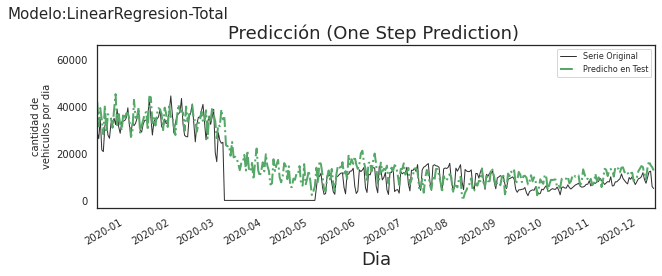

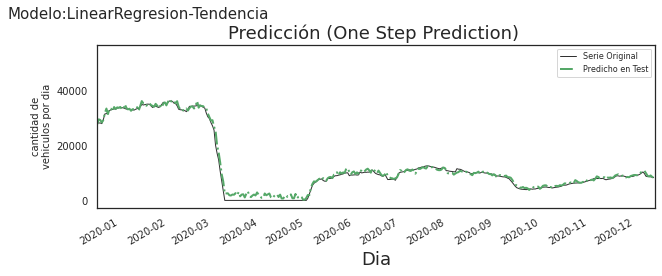

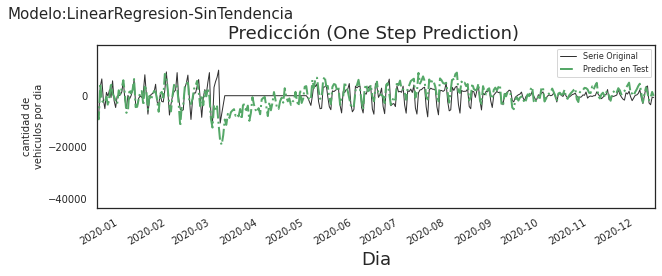

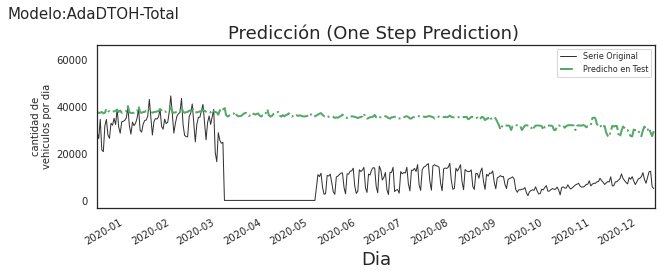

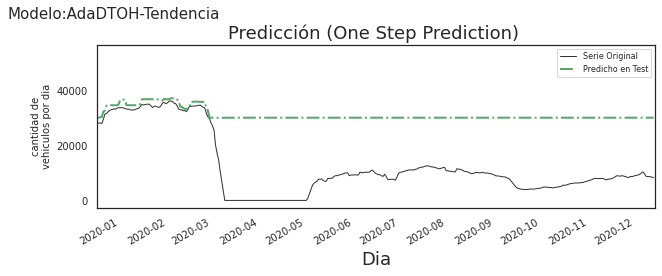

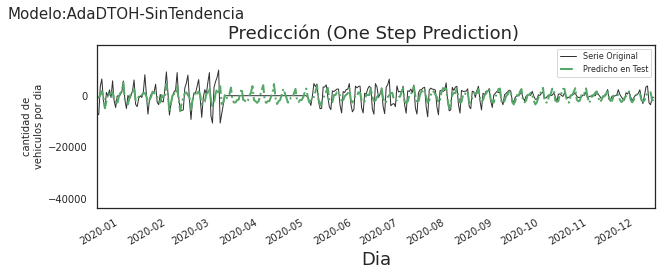

In [118]:
#Sin Cross validation
plt.figure()
#LinearRegresion
#Total
y_train_pred = L_tot.predict(X_tot_train_sc) #predicción con datos de entrenamiento
y_test_pred = L_tot.predict(X_tot_test_sc) #predicción con datos de testeo
plotSerie(X_tot,N_train,look_back,length_total_tot,y_train_pred,y_test_pred,'LinearRegresion-Total')
S_L_tot=MetricasSerie(y_tot_train,y_tot_test,y_train_pred,y_test_pred,'LinearRegresion-Total')

#tendencia 
y_train_pred_t = L_t.predict(X_tend_train_sc) #predicción con datos de entrenamiento
y_test_pred_t = L_t.predict(X_tend_test_sc) #predicción con datos de testeo
N_test=N_test-1
plotSerie(X_t,N_train,look_back,length_total_tend-1,y_train_pred_t,y_test_pred_t,'LinearRegresion-Tendencia')
S_L_t=MetricasSerie(y_tend_train,y_tend_test,y_train_pred_t,y_test_pred_t,'LinearRegresion-Tendencia')

#sin tendencia
#resto 1 al length total porque la serie de tendencia y sin tendencia al extraerle los nan de los extremos no tiene la última fecha del 2020(por el rolling windows), es un tema de la función de graficado
y_train_pred_wOt = L_wOt.predict(X_wOt_train_sc) #predicción con datos de entrenamiento
y_test_pred_wOt = L_wOt.predict(X_wOt_test_sc) #predicción con datos de testeo
plotSerie(X_wOt,N_train,look_back,length_total_wOt-1,y_train_pred_wOt,y_test_pred_wOt,'LinearRegresion-SinTendencia')
S_L_wOt=MetricasSerie(y_wOt_train,y_wOt_test,y_train_pred_wOt,y_test_pred_wOt,'LinearRegresion-SinTendencia')


#Adaboost DT regression optimizado
#Total
y_train_pred = Ada_tot.predict(X_tot_train_sc) #predicción con datos de entrenamiento
y_test_pred = Ada_tot.predict(X_tot_test_sc) #predicción con datos de testeo

plotSerie(X_tot,N_train,look_back,length_total_tot,y_train_pred,y_test_pred,'AdaDTOH-Total')
S_Ada_tot=MetricasSerie(y_tot_train,y_tot_test,y_train_pred,y_test_pred,'AdaDTOH-Total')

#tendencia 
y_train_pred_t = Ada_t.predict(X_tend_train_sc) #predicción con datos de entrenamiento
y_test_pred_t = Ada_t.predict(X_tend_test_sc) #predicción con datos de testeo
N_test=N_test-1
plotSerie(X_t,N_train,look_back,length_total_tend-1,y_train_pred_t,y_test_pred_t,'AdaDTOH-Tendencia')
S_Ada_t=MetricasSerie(y_tend_train,y_tend_test,y_train_pred_t,y_test_pred_t,'AdaDTOH-Tendencia')

#sin tendencia
#resto 1 al length total porque la serie de tendencia y sin tendencia al extraerle los nan de los extremos no tiene la última fecha del 2020(por el rolling windows), es un tema de la función de graficado
y_train_pred_wOt = Ada_wOt.predict(X_wOt_train_sc) #predicción con datos de entrenamiento
y_test_pred_wOt = Ada_wOt.predict(X_wOt_test_sc) #predicción con datos de testeo
plotSerie(X_wOt,N_train,look_back,length_total_wOt-1,y_train_pred_wOt,y_test_pred_wOt,'AdaDTOH-SinTendencia')
S_Ada_wOt=MetricasSerie(y_wOt_train,y_wOt_test,y_train_pred_wOt,y_test_pred_wOt,'AdaDTOH-SinTendencia')




In [119]:
#Genero una tabla de los scores para los distintos modelos 
SCOR_tot=pd.DataFrame([S_L_tot,S_Ada_tot],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])
SCOR_t=pd.DataFrame([S_L_t,S_Ada_t],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])
SCOR_wOt=pd.DataFrame([S_L_wOt,S_Ada_wOt],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])


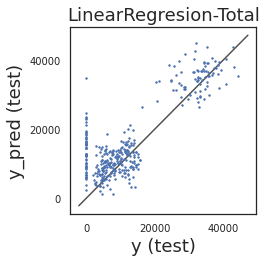

Error RMSE en datos de train: 4665.6015
Error RMSE en datos de test: 7508.4366
Error R2 en datos de train: 0.63594
Error R2 en datos de test: 0.60223


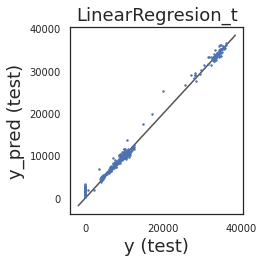

Error RMSE en datos de train: 679.701
Error RMSE en datos de test: 1011.8815
Error R2 en datos de train: 0.98067
Error R2 en datos de test: 0.99205


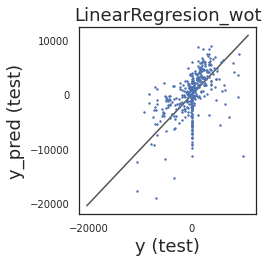

Error RMSE en datos de train: 2987.0517
Error RMSE en datos de test: 3686.9168
Error R2 en datos de train: 0.74938
Error R2 en datos de test: -0.32714


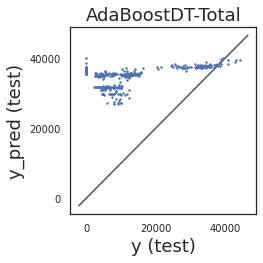

Error RMSE en datos de train: 4375.8012
Error RMSE en datos de test: 24745.0348
Error R2 en datos de train: 0.67977
Error R2 en datos de test: -3.32027


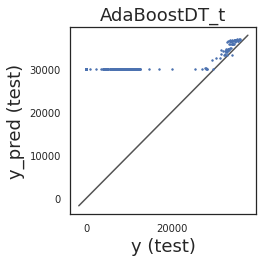

Error RMSE en datos de train: 942.5086
Error RMSE en datos de test: 20875.7753
Error R2 en datos de train: 0.96284
Error R2 en datos de test: -2.38205


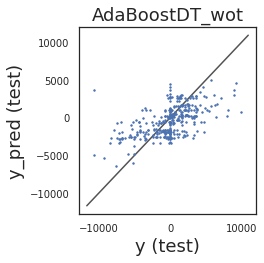

Error RMSE en datos de train: 3147.8153
Error RMSE en datos de test: 2644.0817
Error R2 en datos de train: 0.72168
Error R2 en datos de test: 0.31744


In [120]:
#linear regression
evaluar_model(L_tot,X_tot_train_sc, X_tot_test_sc, y_tot_train, y_tot_test,modelo_a_evaluar='LinearRegresion-Total')
evaluar_model(L_t,X_tend_train_sc, X_tend_test_sc, y_tend_train, y_tend_test,modelo_a_evaluar='LinearRegresion_t')
evaluar_model(L_wOt,X_wOt_train_sc, X_wOt_test_sc, y_wOt_train, y_wOt_test,modelo_a_evaluar='LinearRegresion_wot')

#adaboost DT
evaluar_model(Ada_tot,X_tot_train_sc, X_tot_test_sc, y_tot_train, y_tot_test,modelo_a_evaluar='AdaBoostDT-Total')
evaluar_model(Ada_t,X_tend_train_sc, X_tend_test_sc, y_tend_train, y_tend_test,modelo_a_evaluar='AdaBoostDT_t')
evaluar_model(Ada_wOt,X_wOt_train_sc, X_wOt_test_sc, y_wOt_train, y_wOt_test,modelo_a_evaluar='AdaBoostDT_wot')


**Análisis de sus rendimientos en las tres series.** 

En el caso de los benchmark que se eligieron se obtuvo que la regresión lineal pudo capturar  el cambio drástico producto del fenómeno externo. Se hace notar que el mejor rendimiento se dió en la serie de tendencia que en la serie sin tendencia y la total. En este caso se puede entender ese rendimiento debido a que la forma funcional que tiene la serie tendencial es más suave que las demás y por ello predecir es más “facil”. Sin embargo, la serie sin tendencia pudo replicar las etapas cíclicas, no así el cambio abrupto. Esto además permitió a la serie total replicar la caida (aunque más suave y de forma oscilante) y aproximarse más a la realidad.
En términos generales, las métricas muestran un desempeño tolerable para el caso de la serie total. Llamó la atención la buena aproximación que hizo en la serie tendencial, con un rendimiento óptimo.  No tanto sucedió con la serie sin tendencia, debido a la aparición del factor externo que generó una subestimación del modelo bastante notable en el gráfico de dispersión. 
Se observó que para la serie general el modelo lineal tiende a sobreestimar los valores. Aún así con un modelo simple se pudo obtener resultados favorables. Esto demuestra que siempre es bueno considerar “el remedio más simple” ante los problemas (navaja de Ockham)


Para el caso del “mejor” modelo del proyecto 3, se observa que para la serie general y la tendencial una sobreestimación muy importante donde no logra capturar el cambio drástico y apartir de allí el modelo no “funciona”. En cambio para la serie sin tendencia, si bien los cambios más abruptos no son capturados (tanto el parate del tráfico como los extremos), la oscilación general es tolerantemente capturada (mostrando sobreestimación en tráfico bajos y subestimación con tráfico alto). 
En términos generales, este modelo no fue óptimo para la predicción del 2020 (en el proyecto 3 el objetivo fue último trimestre del 2019 por ello fue elegido como el mejor, mas no se hizo un análisis exhaustivo para predecir el 2020).




---------------------------
--------------------------------

## Parte C: Modelos de ML avanzados y Neural Network
###Parte 1: Modelos Avanzados de Gradient Boosting
* Elección y elaboración de predicciones con Modelos de Gradient Boosting: LightGBM, SGBM, XGBost.


El Gradient boosting es una técnica de aprendizaje automático utilizado para el análisis de la regresión y para problemas de clasificación estadística, el cual produce un modelo predictivo en forma de un conjunto de modelos de predicción débiles, típicamente árboles de decisión. Construye el modelo de forma escalonada como lo hacen otros métodos de boosting, y los generaliza permitiendo la optimización arbitraria de una función de pérdida diferenciable.

El Boosting puede ser interpretado como un algoritmo de optimización en una función de costo sobre el espacio de función mediante la elección iterativa de una función (hipótesis débil) que apunta en la dirección del gradiente negativo (descenso por gradiente).

En este caso se verán modelos avanzados que introducen la idea del Gradient Boosting con mejor optimización. Para más información puede conocer más sobre estos temas [aquí.](https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/) [SGB](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)

El objetivo por el cual se decide utilizar estos modelos avanzados es por el hecho de "aprender" a medida que se va ajustando en cada parte de la regresión. Esta idea de ir ajustando es un concepto que en la predicción de series temporales es algo que ayuda a "mejorar" a partir de correcciones paso a paso(filosofía que se usa en la asimilación de datos).


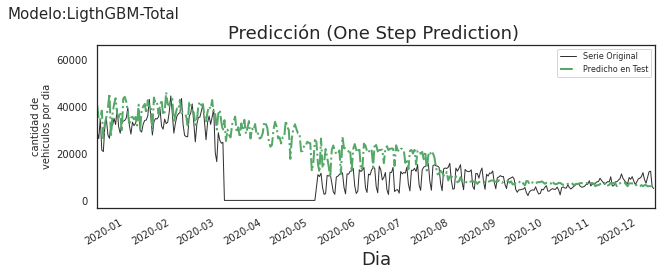

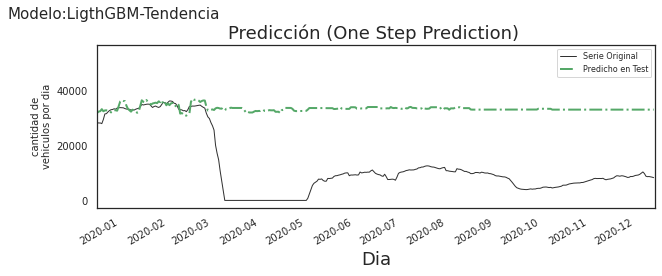

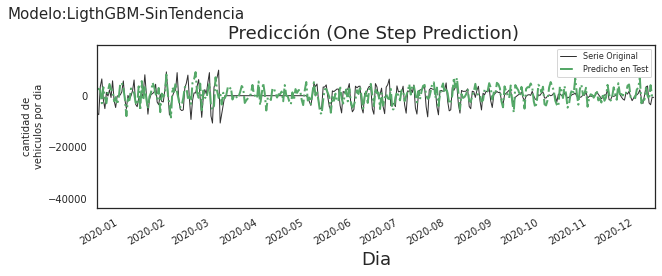

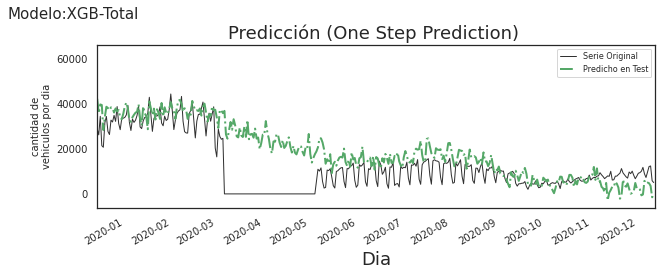

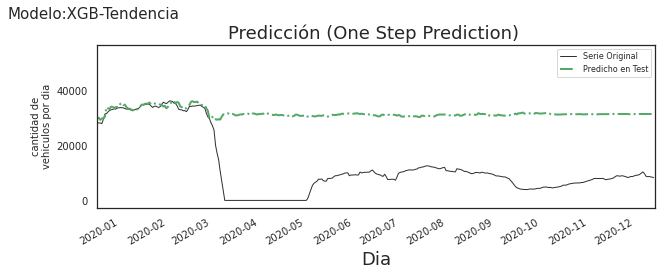

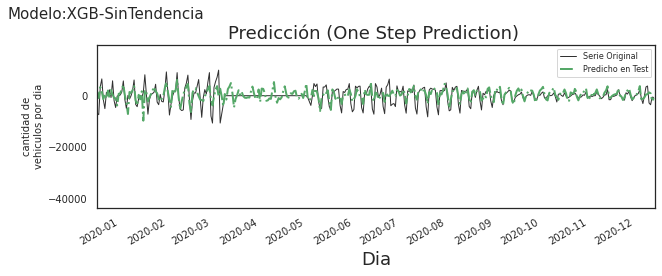

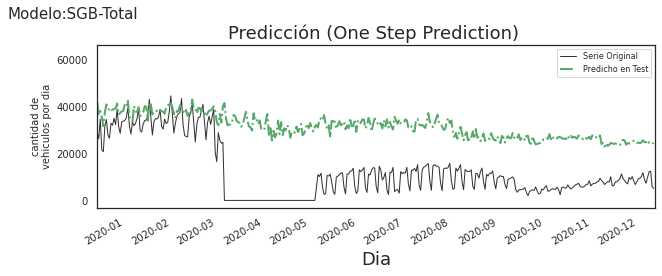

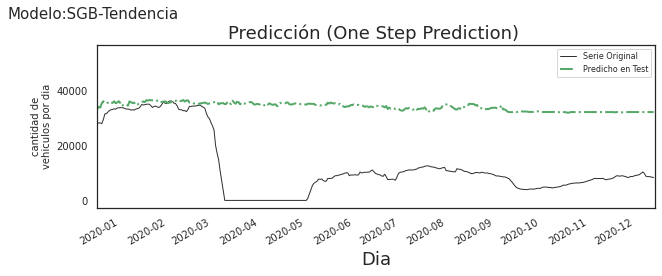

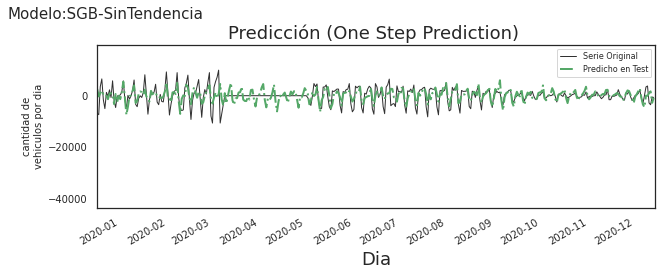

In [121]:
#LIGHTGBM
#Eligo parámetros del LGBM
LGBM_tot = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_tot_train_sc, y_tot_train)
LGBM_t = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_tend_train_sc, y_tend_train)
LGBM_wOt = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_wOt_train_sc, y_wOt_train)

#Total
y_train_pred = LGBM_tot.predict(X_tot_train_sc) #predicción con datos de entrenamiento
y_test_pred = LGBM_tot.predict(X_tot_test_sc) #predicción con datos de testeo
plotSerie(X_tot,N_train,look_back,length_total_tot,y_train_pred,y_test_pred,'LigthGBM-Total')
S_LGBM_tot=MetricasSerie(y_tot_train,y_tot_test,y_train_pred,y_test_pred,'LigthGBM-Total')

#tendencia 
y_train_pred_t = LGBM_t.predict(X_tend_train_sc) #predicción con datos de entrenamiento
y_test_pred_t = LGBM_t.predict(X_tend_test_sc) #predicción con datos de testeo
N_test=N_test-1
plotSerie(X_t,N_train,look_back,length_total_tend-1,y_train_pred_t,y_test_pred_t,'LigthGBM-Tendencia')
S_LGBM_t=MetricasSerie(y_tend_train,y_tend_test,y_train_pred_t,y_test_pred_t,'LigthGBM-Tendencia')

#sin tendencia
#resto 1 al length total porque la serie de tendencia y sin tendencia al extraerle los nan de los extremos no tiene la última fecha del 2020(por el rolling windows), es un tema de la función de graficado
y_train_pred_wOt = LGBM_wOt.predict(X_wOt_train_sc) #predicción con datos de entrenamiento
y_test_pred_wOt = LGBM_wOt.predict(X_wOt_test_sc) #predicción con datos de testeo
plotSerie(X_wOt,N_train,look_back,length_total_wOt-1,y_train_pred_wOt,y_test_pred_wOt,'LigthGBM-SinTendencia')
S_LGBM_wOt=MetricasSerie(y_wOt_train,y_wOt_test,y_train_pred_wOt,y_test_pred_wOt,'LigthGBM-SinTendencia')


#XGBoost
#Eligo parámetros del XGBoost
XGB_tot = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_tot_train_sc, y_tot_train)
XGB_t = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_tend_train_sc, y_tend_train)
XGB_wOt = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_wOt_train_sc, y_wOt_train)


#Total
y_train_pred = XGB_tot.predict(X_tot_train_sc) #predicción con datos de entrenamiento
y_test_pred = XGB_tot.predict(X_tot_test_sc) #predicción con datos de testeo
plotSerie(X_tot,N_train,look_back,length_total_tot,y_train_pred,y_test_pred,'XGB-Total')
S_XGB_tot=MetricasSerie(y_tot_train,y_tot_test,y_train_pred,y_test_pred,'XGB-Total')

#tendencia 
y_train_pred_t = XGB_t.predict(X_tend_train_sc) #predicción con datos de entrenamiento
y_test_pred_t = XGB_t.predict(X_tend_test_sc) #predicción con datos de testeo
N_test=N_test-1
plotSerie(X_t,N_train,look_back,length_total_tend-1,y_train_pred_t,y_test_pred_t,'XGB-Tendencia')
S_XGB_t=MetricasSerie(y_tend_train,y_tend_test,y_train_pred_t,y_test_pred_t,'XGB-Tendencia')

#sin tendencia
#resto 1 al length total porque la serie de tendencia y sin tendencia al extraerle los nan de los extremos no tiene la última fecha del 2020(por el rolling windows), es un tema de la función de graficado
y_train_pred_wOt = XGB_wOt.predict(X_wOt_train_sc) #predicción con datos de entrenamiento
y_test_pred_wOt = XGB_wOt.predict(X_wOt_test_sc) #predicción con datos de testeo
plotSerie(X_wOt,N_train,look_back,length_total_wOt-1,y_train_pred_wOt,y_test_pred_wOt,'XGB-SinTendencia')
S_XGB_wOt=MetricasSerie(y_wOt_train,y_wOt_test,y_train_pred_wOt,y_test_pred_wOt,'XGB-SinTendencia')


#GradientBoosting
#Eligo parámetros del GB, cuando subsample es menor a 1 se transforma en Stochastic Gradient Boosting
GB_tot = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_tot_train_sc, y_tot_train)
GB_t = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_tend_train_sc, y_tend_train)
GB_wOt = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_wOt_train_sc, y_wOt_train)


#Total
y_train_pred = GB_tot.predict(X_tot_train_sc) #predicción con datos de entrenamiento
y_test_pred = GB_tot.predict(X_tot_test_sc) #predicción con datos de testeo
plotSerie(X_tot,N_train,look_back,length_total_tot,y_train_pred,y_test_pred,'SGB-Total')
S_GB_tot=MetricasSerie(y_tot_train,y_tot_test,y_train_pred,y_test_pred,'SGB-Total')

#tendencia 
y_train_pred_t = GB_t.predict(X_tend_train_sc) #predicción con datos de entrenamiento
y_test_pred_t = GB_t.predict(X_tend_test_sc) #predicción con datos de testeo
N_test=N_test-1
plotSerie(X_t,N_train,look_back,length_total_tend-1,y_train_pred_t,y_test_pred_t,'SGB-Tendencia')
S_GB_t=MetricasSerie(y_tend_train,y_tend_test,y_train_pred_t,y_test_pred_t,'SGB-Tendencia')

#Sin tendencia
#resto 1 al length total porque la serie de tendencia y sin tendencia al extraerle los nan de los extremos no tiene la última fecha del 2020(por el rolling windows), es un tema de la función de graficado
y_train_pred_wOt = GB_wOt.predict(X_wOt_train_sc) #predicción con datos de entrenamiento
y_test_pred_wOt = GB_wOt.predict(X_wOt_test_sc) #predicción con datos de testeo
plotSerie(X_wOt,N_train,look_back,length_total_wOt-1,y_train_pred_wOt,y_test_pred_wOt,'SGB-SinTendencia')
S_GB_wOt=MetricasSerie(y_wOt_train,y_wOt_test,y_train_pred_wOt,y_test_pred_wOt,'SGB-SinTendencia')

In [122]:
#Genero una tabla de los scores para los distintos modelos 
SCOR_tot=pd.DataFrame([S_L_tot,S_Ada_tot,S_LGBM_tot,S_XGB_tot,S_GB_tot],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])
SCOR_t=pd.DataFrame([S_L_t,S_Ada_t,S_LGBM_t,S_XGB_t,S_GB_t],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])
SCOR_wOt=pd.DataFrame([S_L_wOt,S_Ada_wOt,S_LGBM_wOt,S_XGB_wOt,S_GB_wOt],columns=['Modelo','MAE_train','MAE_test','MSE_train','MSE_test','RMSE_train','RMSE_test','R2_train','R2_test'])



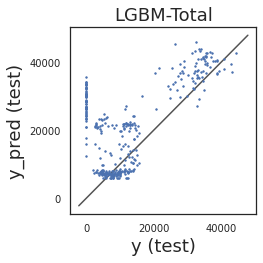

Error RMSE en datos de train: 3.063
Error RMSE en datos de test: 13308.4356
Error R2 en datos de train: 1.0
Error R2 en datos de test: -0.24965


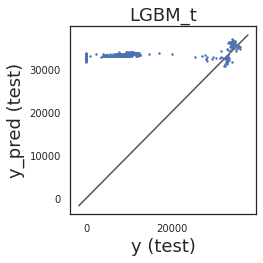

Error RMSE en datos de train: 0.4423
Error RMSE en datos de test: 23583.4614
Error R2 en datos de train: 1.0
Error R2 en datos de test: -3.31629


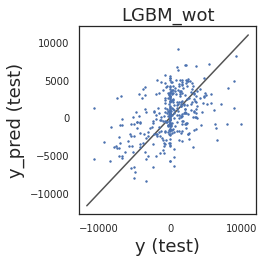

Error RMSE en datos de train: 1.1088
Error RMSE en datos de test: 3294.3897
Error R2 en datos de train: 1.0
Error R2 en datos de test: -0.0596


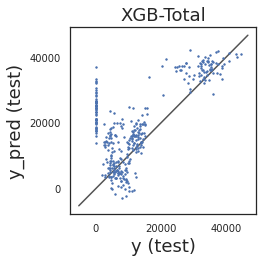

Error RMSE en datos de train: 871.4193
Error RMSE en datos de test: 11600.943
Error R2 en datos de train: 0.9873
Error R2 en datos de test: 0.05044


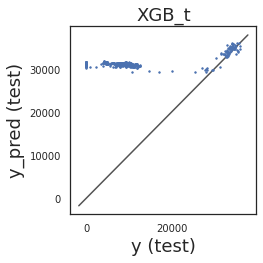

Error RMSE en datos de train: 264.826
Error RMSE en datos de test: 21820.9364
Error R2 en datos de train: 0.99707
Error R2 en datos de test: -2.69523


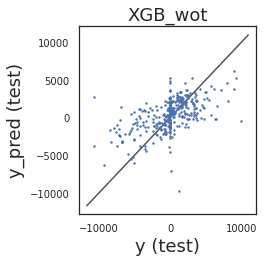

Error RMSE en datos de train: 660.1135
Error RMSE en datos de test: 2701.3301
Error R2 en datos de train: 0.98776
Error R2 en datos de test: 0.28756


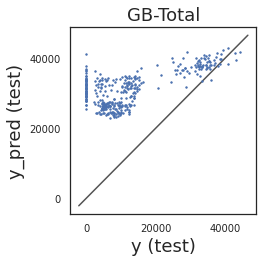

Error RMSE en datos de train: 171.9814
Error RMSE en datos de test: 20878.8648
Error R2 en datos de train: 0.99951
Error R2 en datos de test: -2.07573


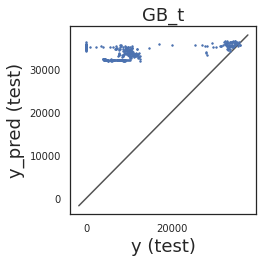

Error RMSE en datos de train: 31.9707
Error RMSE en datos de test: 24079.2793
Error R2 en datos de train: 0.99996
Error R2 en datos de test: -3.49969


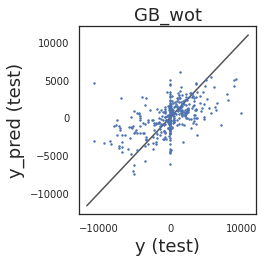

Error RMSE en datos de train: 135.7425
Error RMSE en datos de test: 2728.0305
Error R2 en datos de train: 0.99948
Error R2 en datos de test: 0.27341


In [123]:
#LGBM regression
evaluar_model(LGBM_tot,X_tot_train_sc, X_tot_test_sc, y_tot_train, y_tot_test,modelo_a_evaluar='LGBM-Total')
evaluar_model(LGBM_t,X_tend_train_sc, X_tend_test_sc, y_tend_train, y_tend_test,modelo_a_evaluar='LGBM_t')
evaluar_model(LGBM_wOt,X_wOt_train_sc, X_wOt_test_sc, y_wOt_train, y_wOt_test,modelo_a_evaluar='LGBM_wot')
#XGBoost regression
evaluar_model(XGB_tot,X_tot_train_sc, X_tot_test_sc, y_tot_train, y_tot_test,modelo_a_evaluar='XGB-Total')
evaluar_model(XGB_t,X_tend_train_sc, X_tend_test_sc, y_tend_train, y_tend_test,modelo_a_evaluar='XGB_t')
evaluar_model(XGB_wOt,X_wOt_train_sc, X_wOt_test_sc, y_wOt_train, y_wOt_test,modelo_a_evaluar='XGB_wot')
#GradientBoosting Stochastic regression
evaluar_model(GB_tot,X_tot_train_sc, X_tot_test_sc, y_tot_train, y_tot_test,modelo_a_evaluar='GB-Total')
evaluar_model(GB_t,X_tend_train_sc, X_tend_test_sc, y_tend_train, y_tend_test,modelo_a_evaluar='GB_t')
evaluar_model(GB_wOt,X_wOt_train_sc, X_wOt_test_sc, y_wOt_train, y_wOt_test,modelo_a_evaluar='GB_wot')


Analizando el LightGBM se obseva que  para la serie total, durante el 2020, previo a la caida abrupta y posterior, el modelo tiende a sobreestimar la predicción. Aún así se ajusta en el decaimiento que sufre pero más lentamente de lo que uno quisiera.  En cuanto a la serie de la tendencia se observa un comportamiento similar que el visto en el Adaboost donde la predicción parece ser “buena” los primeros tres meses pero luego su rendimiento sobreestima groseramente la realidad.
Cabe destacar que para la serie sin tendencia varios picos parecen ser resueltos apropiadamente y si bien no captura correctamente el momento del fenómeno externo, al restablecerse la oscilación el modelo es capaz en gran medida de predecir esos cambios.

Para el caso del XGBoost ocurre algo similar que con el anterior, salvo en la serie sin tendencia donde inicialmente la estimación del modelo era menor a lo real y cuando retoma la oscilación luego del fenómeno externo empieza a capturar más oscilaciones ya que el comportamiento es más suavizado.

Respecto al Stochastic Gradient Boosting, mostraron los peores resultados de estos tres modelos. En primer lugar porque no logra capturar la mayoría de los patrones, pre y post evento extremo. Tiende a predecir una tendencia mayor que la observada y en cuanto a la estacionaridad sólo se ajusta en las oscilaciones más suaves del último trimestre del 2020.

Apartir de estos resultados se propone indagar en la técnica de cross validación Chaining foward para ver si con la evolución en el tiempo mejora las predicciones.

------------------------

* Implementación de CrossValidation en Series de tiempo

[Day Forward-Chaining](https://towardsdatascience.com/time-series-nested-cross-validation-76adba623eb9)

En el caso de las series de tiempo hacer una validación cruzada tradicional mediante la particion arbitraria del train y test no es recomendada ya que las series tienen la particularidad de que los datos presentan un orden secuencial, acausa de eso el CV de k-folds puede producir estimaciones sesgadas del error de predicción en un conjunto de pruebas independiente. 

Para producir una mejor estimación del error de predicción del modelo, un enfoque común es crear muchas divisiones de entrenamiento/prueba y promediar los errores en todas las divisiones. La técnica que utilizamos, denominada Day Forward-Chaining, se basa en un método denominado forward-chaining (también conocido en la literatura como evaluación rolling-origin (Tashman 2000) y rolling-origin-recalibration (Bergmeir y Benítez 2012)). Con este método, consideramos sucesivamente cada día como el conjunto de pruebas y asignamos todos los datos anteriores al conjunto de entrenamiento. Este método produce muchas divisiones diferentes de entrenamiento/prueba y el error de cada división se promedia para calcular una estimación robusta del error del modelo.

Serie total


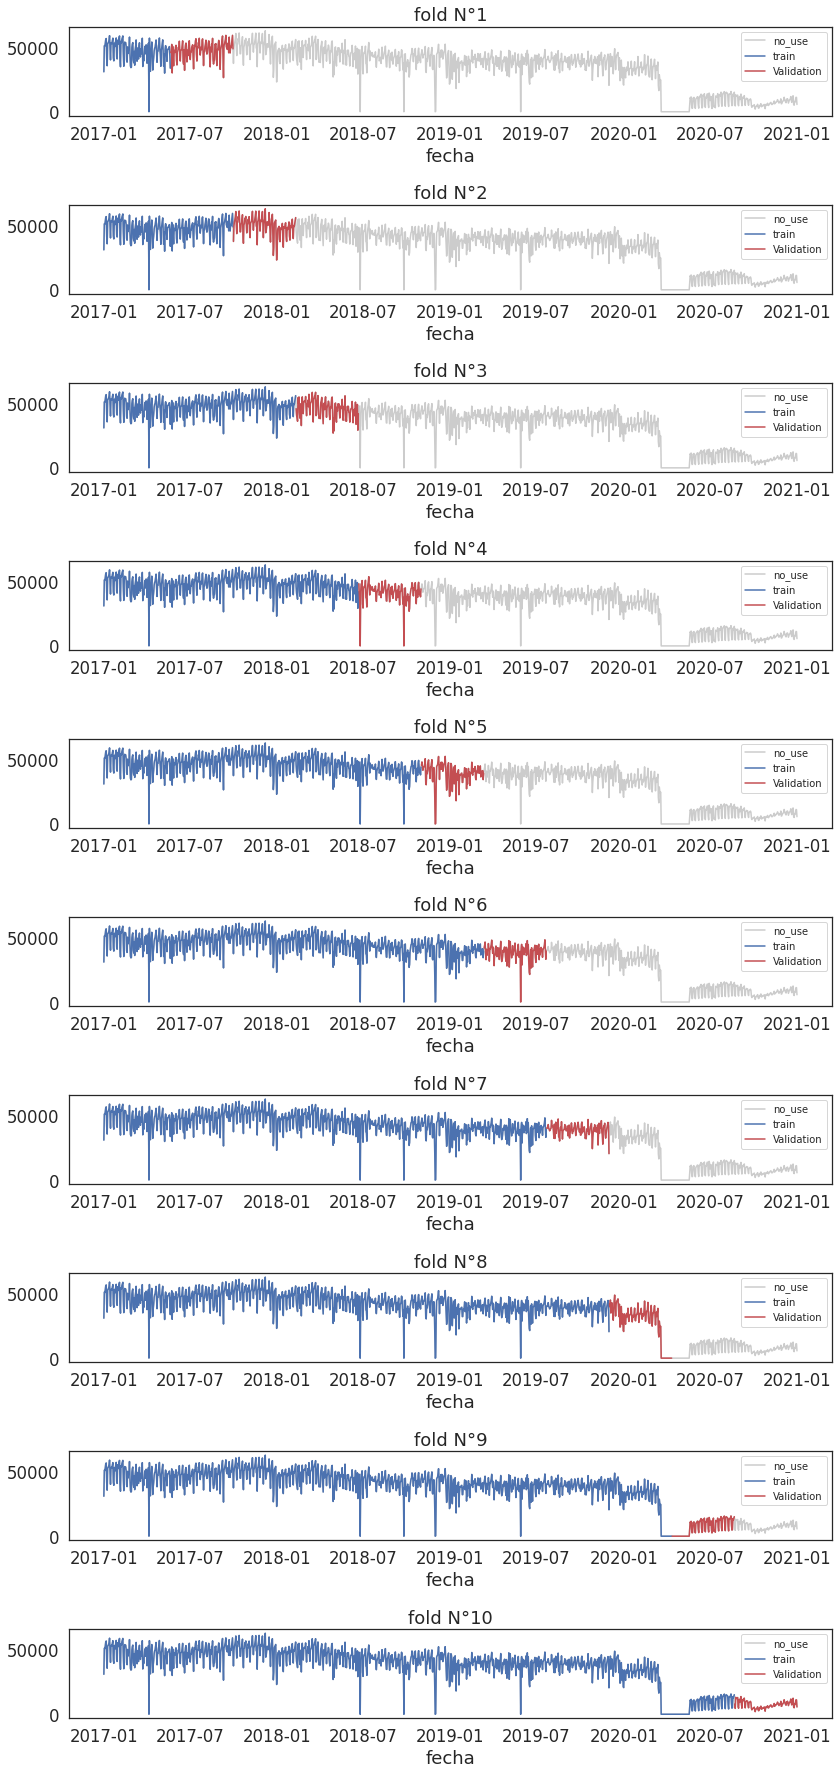


Tendencia


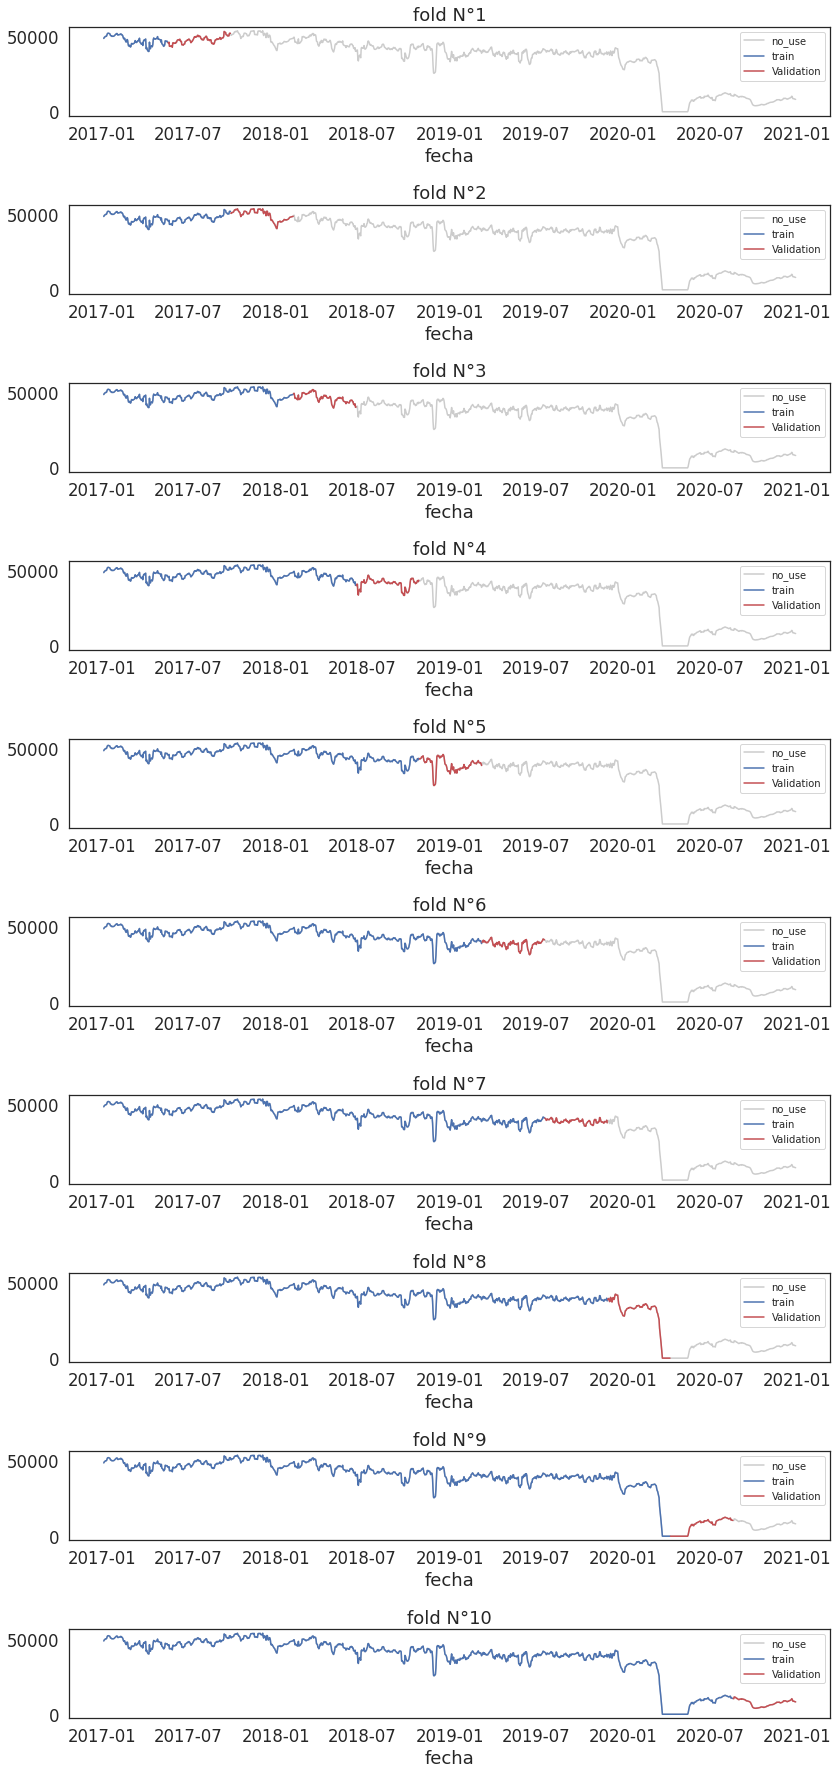


Sin tendencia


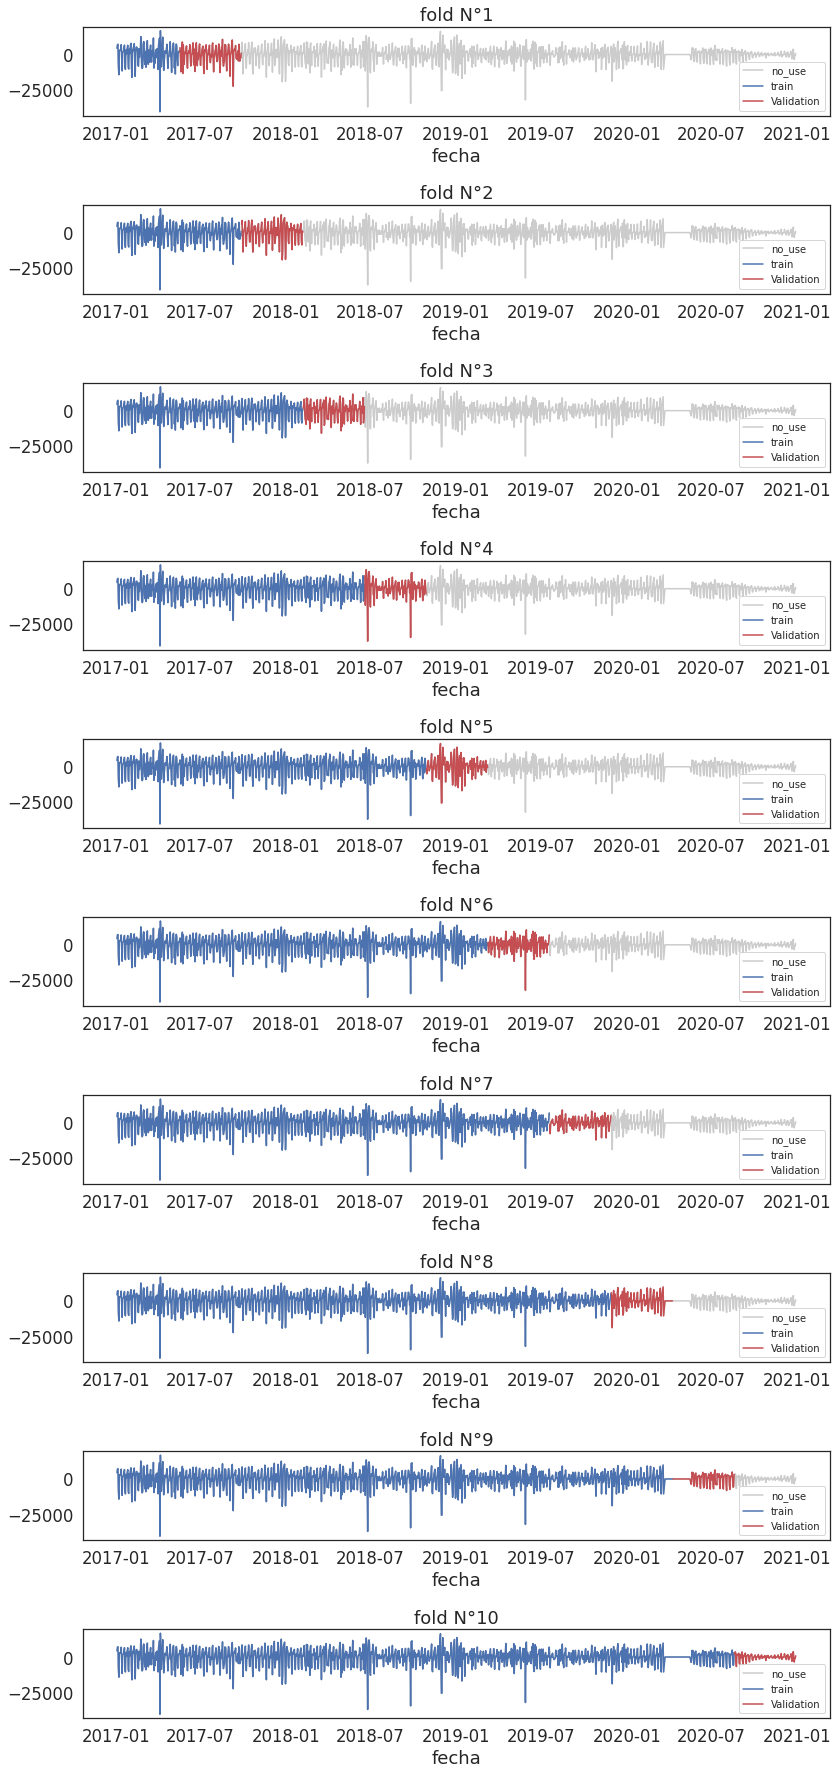

In [124]:
#observo gráficamente el CV Chaining foward para cada serie para saber cómo es la evolución.

print('Serie total')
n_splits=10
df=X_tot#[1000:-1]
folds = TimeSeriesSplit(n_splits=n_splits)  
fig, axes = plt.subplots(n_splits,1, figsize=(12, 25))
for i, (train_index, test_index) in enumerate(folds.split(df)):  
    sns.lineplot(data=df, x=df.index, y=df.values, ax=axes[i], label='no_use',color="0.8")
    sns.lineplot(data=df.iloc[train_index], x=df.iloc[train_index].index, y=df.iloc[train_index].values, ax=axes[i], label='train',color="b")
    sns.lineplot(data=df.iloc[test_index], x=df.iloc[test_index].index, y=df.iloc[test_index].values, ax=axes[i], label='Validation',color="r")
    axes[i].title.set_text('fold N°'+str(i+1))
    axes[i].legend(fontsize=10)
    plt.tight_layout()
plt.show()  

print()
print('Tendencia')
df=X_t#[1000:-1]
folds = TimeSeriesSplit(n_splits=n_splits)  
fig, axes = plt.subplots(n_splits,1, figsize=(12, 25))
for i, (train_index, test_index) in enumerate(folds.split(df)):  
    sns.lineplot(data=df, x=df.index, y=df.values, ax=axes[i], label='no_use',color="0.8")
    sns.lineplot(data=df.iloc[train_index], x=df.iloc[train_index].index, y=df.iloc[train_index].values, ax=axes[i], label='train',color="b")
    sns.lineplot(data=df.iloc[test_index], x=df.iloc[test_index].index, y=df.iloc[test_index].values, ax=axes[i], label='Validation',color="r")
    axes[i].legend(fontsize=10)
    axes[i].title.set_text('fold N°'+str(i+1))    
    plt.tight_layout()
plt.show() 

print()
print('Sin tendencia')
df=X_wOt#[1000:-1]
folds = TimeSeriesSplit(n_splits=n_splits)  
fig, axes = plt.subplots(n_splits,1, figsize=(12, 25))
for i, (train_index, test_index) in enumerate(folds.split(df)):  
    sns.lineplot(data=df, x=df.index, y=df.values, ax=axes[i], label='no_use',color="0.8")
    sns.lineplot(data=df.iloc[train_index], x=df.iloc[train_index].index, y=df.iloc[train_index].values, ax=axes[i], label='train',color="b")
    sns.lineplot(data=df.iloc[test_index], x=df.iloc[test_index].index, y=df.iloc[test_index].values, ax=axes[i], label='Validation',color="r")
    axes[i].title.set_text('fold N°'+str(i+1))
    axes[i].legend(fontsize=10)
    plt.tight_layout()
plt.show() 

Serie Total LGBM MEAN RMSE test: 2499.07
Serie Total LGBM STD RMSE test: 1967.47
Serie Total LGBM MEAN R2 test: 0.86
Serie Total LGBM STD R2 test: 0.13



Tendencia de la serie LGBM MEAN RMSE test: 2584.38
Tendencia de la serie LGBM STD RMSE test: 3594.65
Tendencia de la serie LGBM MEAN R2 test: 0.60
Tendencia de la serie LGBM STD R2 test: 0.58



Serie sin Tendencia LGBM MEAN RMSE test: 781.27
Serie sin Tendencia LGBM STD RMSE test: 746.11
Serie sin Tendencia LGBM MEAN R2 test: 0.97
Serie sin Tendencia LGBM STD R2 test: 0.04



Serie Total XGBM MEAN RMSE test: 620.08
Serie Total XGBM STD RMSE test: 983.64
Serie Total XGBM MEAN R2 test: 0.96
Serie Total XGBM STD R2 test: 0.11



Tendencia de la serie XGBM MEAN RMSE test: 1470.15
Tendencia de la serie XGBM STD RMSE test: 2801.18
Tendencia de la serie XGBM MEAN R2 test: 0.89
Tendencia de la serie XGBM STD R2 test: 0.19



Serie sin Tendencia XGBM MEAN RMSE test: 209.98
Serie sin Tendencia XGBM STD RMSE test: 215.24
Serie sin Tendencia XG

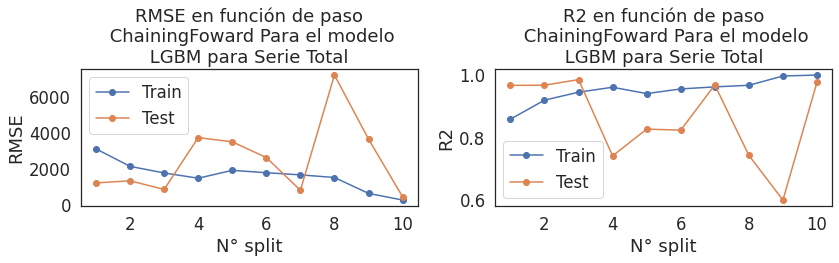

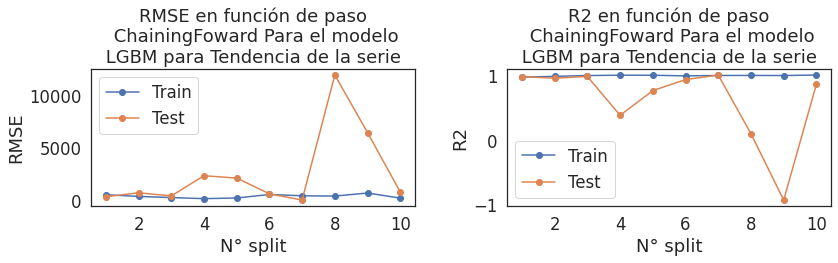

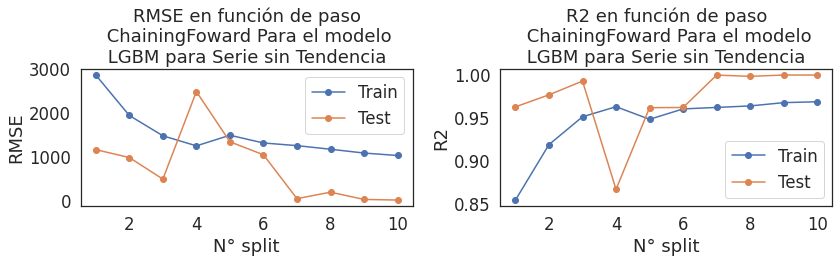

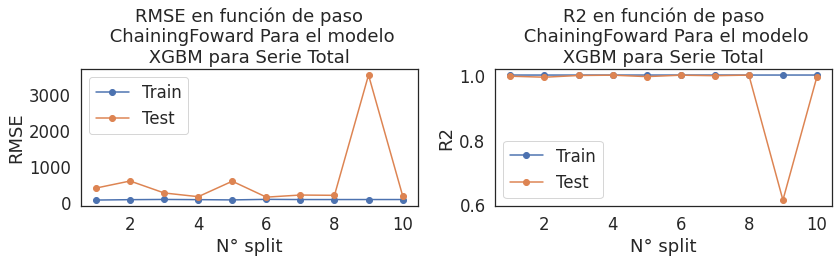

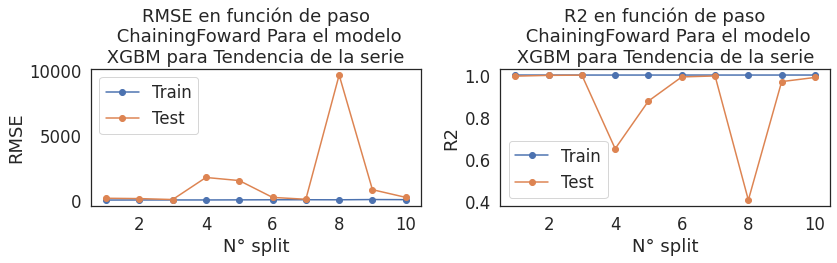

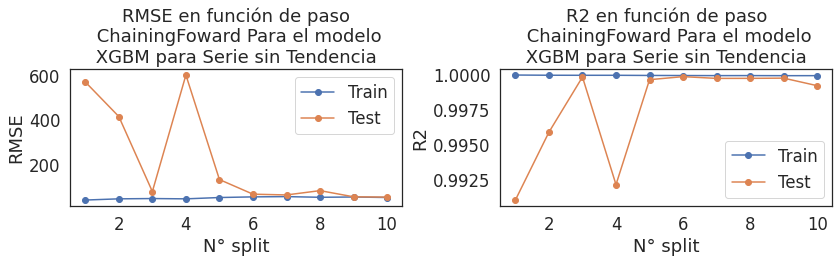

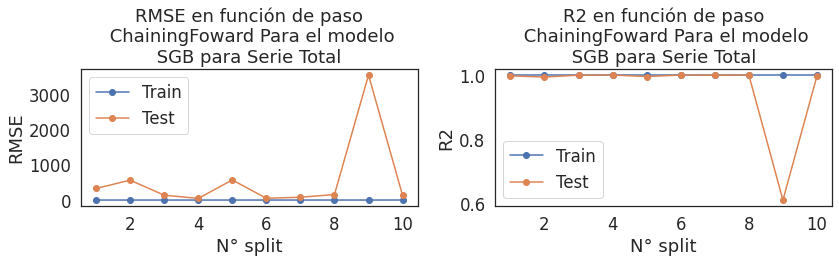

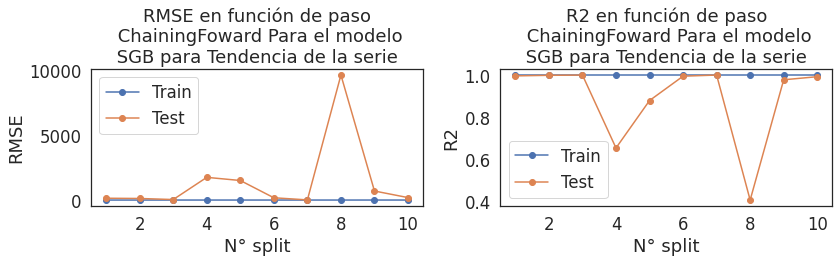

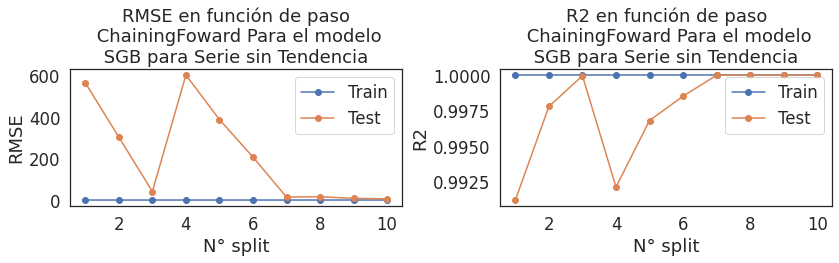

In [125]:
#evalúo el Chaining para cada modelo y tipo de serie

LGBM_tot = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_tot_train_sc, y_tot_train)
LGBM_t = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_tend_train_sc, y_tend_train)
LGBM_wOt = LGBMRegressor(learning_rate=0.5, n_estimators=300,  reg_alpha=0.5).fit(X_wOt_train_sc, y_wOt_train)


XGB_tot = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_tot_train_sc, y_tot_train)
XGB_t = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_tend_train_sc, y_tend_train)
XGB_wOt = XGBRegressor(n_estimators=300,subsample=.5,objective='reg:squarederror').fit(X_wOt_train_sc, y_wOt_train)


GB_tot = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_tot_train_sc, y_tot_train)
GB_t = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_tend_train_sc, y_tend_train)
GB_wOt = GradientBoostingRegressor(learning_rate=0.1,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10).fit(X_wOt_train_sc, y_wOt_train)
###############################################################################

model='LGBM'
Serie='Serie Total '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_tot,n_splits,LGBM_tot,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Tendencia de la serie '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_t,n_splits,LGBM_t,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Serie sin Tendencia '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_wOt,n_splits,LGBM_wOt,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)



model='XGBM'
Serie='Serie Total '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_tot,n_splits,XGB_tot,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Tendencia de la serie '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_t,n_splits,XGB_t,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Serie sin Tendencia '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_wOt,n_splits,XGB_wOt,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)



model='SGB'
Serie='Serie Total '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_tot,n_splits,GB_tot,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Tendencia de la serie '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_t,n_splits,GB_t,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)
Serie='Serie sin Tendencia '
rmsetrain,r2train,rmsetest,r2test=ChainingTS(X_wOt,n_splits,GB_wOt,Serie+model)
plotCV_TS(n_splits,rmsetrain,r2train,rmsetest,r2test,model,Serie)



Para analizar el rendimiento del Chaining foward se analizan las últimas 3 separaciones 8-9-10. que es cuando los datos test entran en 2020.
Se observa en términos generales para todos los modelos y las tres series durante el período del último chaining foward  que el RMSE tiene un pico y disminuye fuertemente a valores bajos. Este pico se debe al abrupto decaimiento del tráfico debido al fenómeno externo. Esto además genera una caída del R2 en el mísmo período mostrando que los eventos extremos en la serie tienden a generar una caída predictibilidad. 
Lo que llama la atención es que estos cambios en el RMSE y R2 no se evidencian para la serie sin tendencia. Es probable que los valores no varíen tanto por el hecho de que la magnitud de los datos no es muy amplia respecto a las otras series que sufren cambios importantes (producto de los efectos de la tendencia).
En función de los resutlados promedios del RMSE se observó que los valores del error disminuyeron en uno o dos ordenes de magnitud y una mejora en el R2 con valores alrededor de 0.9 con lo que evidencia que mejora la previsibilidad del modelo.
Con estos resultados se tiene que la implementación de un Cross validation coherente para la serie de tiempo mejora significativamente el resultado aún ante eventos extremos. En este caso si uno refina las particiones para mejorar cómo el modelo aprende de los datos y su evolución es posible que haya una mejora significativa de los errores y la predicción final.


----


## PARTE 2: Neural Network

Las redes neuronales artificiales ([RNA](https://bookdown.org/amanas/traficomadrid/m%C3%A9todos-basados-en-deep-learning.html)) son un modelo computacional inspirado en el comportamiento observado en su homólogo biológico. Consiste en un conjunto de unidades, llamadas neuronas artificiales, conectadas entre sí para transmitirse señales. La información de entrada atraviesa la red neuronal (dónde se somete a diversas operaciones) produciendo valores de salida. Estas redes pueden utilizarse como métodos de pronóstico de series temporales, como veremos más adelante.

Cada neurona está conectada con otras a través de unos enlaces. En estos enlaces el valor de salida de la neurona anterior es multiplicado por un valor de peso. Estos pesos en los enlaces pueden incrementar o inhibir el estado de activación de las neuronas adyacentes. Del mismo modo, a la salida de la neurona, puede existir una función limitadora o umbral, que modifica el valor resultado o impone un límite que se debe sobrepasar antes de propagarse a otra neurona. Esta función se conoce como función de activación.

Así, tenemos la capa de entrada formada por las entradas a la red, la capa de salida formada por las neuronas que constituyen la salida final de la red, y las capas ocultas formadas por las neuronas que se encuentran entre los nodos de entrada y de salida. Una RNA puede tener varias capas ocultas o no tener ninguna. Las conexiones sinápticas (las flechas que llegan y salen de las neuronas) indican el flujo de la señal a través de la red, y tienen asociadas un peso sináptico correspondiente. Si la salida de una neurona va dirigida hacia dos o más neuronas de la siguiente capa, cada una de estas últimas recibe la salida neta de la neurona anterior. La cantidad de capas de una RNA es la suma de las capas ocultas más la capa de salida.

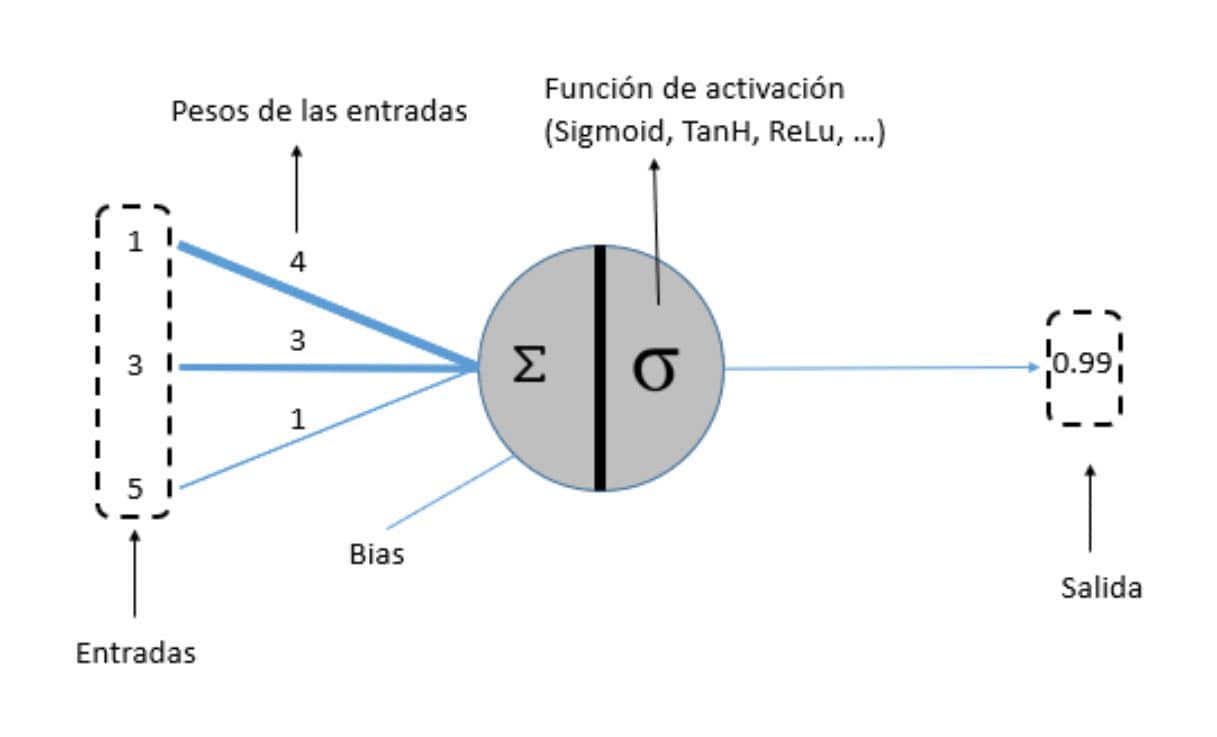


El problema habitual con este tipo de redes multicapa es el de, dados un conjunto de datos ya clasificados, de los que se conoce la salida deseada, proporcionar los pesos adecuados de la red para que se obtenga una aproximación correcta de las salidas si la red recibe únicamente los datos de entrada.

Estos sistemas aprenden y se forman a sí mismos, en lugar de ser programados de forma explícita, y **sobresalen en áreas donde la detección de soluciones o características es difícil de expresar con la programación convencional**. Para realizar este aprendizaje automático, normalmente, se intenta minimizar una función de pérdida que evalúa la red en su total. Los valores de los pesos de las neuronas se van actualizando buscando reducir el valor de la función de pérdida. Este proceso se realiza mediante la propagación hacia atrás.

El **objetivo** de la red neuronal es entonces resolver los problemas de la misma manera que el cerebro humano, aunque las redes neuronales son más abstractas. Las redes neuronales actuales suelen contener desde unos miles a unos pocos millones de unidades neuronales.

En este caso se introducirán herramientas de keras, que es un módulo de tensorflow que ofrece [herramientas para realizar redes neuronales](https://torres.ai/deep-learning-inteligencia-artificial-keras/).

    Existen diferentes parámetros a tener en cuenta:
    -Número de neuronas por capa: es el número de neuronas usadas en cada capa, sea de entrada, ocultas y de salida.

    -Número de capas:
        Capa de entrada: datos iniciales para la red neuronal.
        Capas ocultas: capa intermedia entre la capa de entrada y salida y el lugar donde se realiza todo el cálculo.
        Capa de salida: produce el resultado para las entradas dadas.

    -Números de épocas (epoch): representa la cantidad de veces que desea que su algoritmo se entrene en todo su conjunto de datos.

    -Tamaño del lote (batch): cuando se enfrenta a miles de millones de datos, puede resultar ineficiente (además de contraproducente) alimentar a la red neuronal con todos ellos. Una buena práctica es alimentarlo con muestras más pequeñas de sus datos, llamadas lotes: al hacerlo, cada vez que el algoritmo se entrena, se entrenará en una muestra del mismo tamaño del lote.

    -Optimizador (optimizer): los optimizadores son algoritmos o métodos que se utilizan para cambiar los atributos de la red neuronal, como los pesos y la tasa de aprendizaje, para reducir las pérdidas. Los optimizadores se utilizan para resolver problemas de optimización minimizando la función.

    -Función de pérdida: Las redes neuronales de aprendizaje profundo se entrenan utilizando el algoritmo de optimización de descenso de gradiente estocástico. Como parte del algoritmo de optimización, el error para el estado actual del modelo debe estimarse repetidamente. Esto requiere la elección de una función de error, llamada convencionalmente función de pérdida, que se puede utilizar para estimar la pérdida del modelo de modo que los pesos se puedan actualizar para reducir la pérdida en la siguiente evaluación.

    -Función de activación: es la función a través de la cual pasamos nuestra suma ponderada, para tener una salida significativa, es decir, como un vector de probabilidad o una salida 0-1. Las principales funciones de activación son Sigmoid (para clasificación multiclase se utiliza una variante de esta función, denominada función SoftMax: si el número de clases es 2, entonces softmax es lo mismo que la función Sigmoid), Tanh y ReLU (rectified Linear Unit).

    -Dropout: por cada nueva entrada a la red en fase de entrenamiento, se desactivará aleatoriamente un porcentaje de las neuronas en cada capa oculta, acorde a una probabilidad de descarte (dropout) previamente definida. Lo que se consigue con esto es que ninguna neurona memorice parte de la entrada; que es precisamente lo que sucede cuando tenemos sobreajuste.

    -Regularizers: la técnica de regularización actúa sobre los parámetros de pesos dentro de las redes neuronales. Más específicamente, modifica la función de pérdida de resultado, que a su vez modifica los valores de peso producidos. l1 aplica el factor de regularización L1 (Lasso), l2 aplica el factor de regularización L2 (Ridge). Además, Keras ofrece la opción de regularizar utilizando ambas penalizaciones L1 and L2.

    INFO:
    (http://openaccess.uoc.edu/webapps/o2/bitstream/10609/99386/7/jmartinezrayTFM0619memoria.pdf)
    (https://medium.com/metadatos/t%C3%A9cnicas-de-regularizaci%C3%B3n-b%C3%A1sicas-para-redes-neuronales-b48f396924d4#:~:text=el%20t%C3%A9rmino%20a%C3%B1adido.-,Dropout,probabilidad%20de%20descarte%20previamente%20definida.)
    (https://towardsdatascience.com/neural-networks-parameters-hyperparameters-and-optimization-strategies-3f0842fac0a5)
    (https://towardsdatascience.com/overview-of-various-optimizers-in-neural-networks-17c1be2df6d5)
    (https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
    (https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a)
    (https://towardsdatascience.com/regularization-techniques-and-their-implementation-in-tensorflow-keras-c06e7551e709)
    (https://keras.io/api/layers/regularizers/)



* Red neuronal artificial LSTM 

Las redes neuronales se han utilizado para resolver una amplia variedad de tareas, como por ejemplo los problemas de predicción de series temporales que son complejos para el modelado predictivo. A diferencia de modelos predictivos de regresión, las series temporales también añaden la complejidad de una dependencia de secuencia entre las variables de entrada. Un poderoso tipo de red neuronal diseñada para manejar secuencias la dependencia se llaman [Redes Neuronales Recurrentes](https://unipython.com/curso-de-redes-neuronales-recurrentes/).


Las redes de memoria larga-corto plazo por sus siglas LSTM es un tipo de red neuronal recurrente que se utiliza en el aprendizaje profundo debido a sus grandes arquitecturas las cuales pueden ser entrenadas con éxito.
En este caso se diseñarán dos tipos de redes que utilizarán LSTM, una configuración simple y otra compleja las cuales se definirán en función de las capas que se añaden a la red. Con esto se observará cómo fue el desempeño de la red ante el caso en cuestión que estamos analizando.

Para más información sobre el paso a paso de una red neuronal LSTM: [click aquí](https://ichi.pro/es/guia-ilustrada-de-lstm-y-gru-una-explicacion-paso-a-paso-75771469479713).  [o aquí](https://towardsdatascience.com/3-steps-to-forecast-time-series-lstm-with-tensorflow-keras-ba88c6f05237)


¿Cómo definí estos parámetros?
    El número de capas, neuronas por capa, batch, los elegí haciendo repeticiones manuales.

    Las funciones de activación (ReLU y Sigmoid) las determiné como sugería la bibliografía: la función ReLU es muy rápida en términos de entrenamiento, mientras que Sigmoid es más compleja y lleva más tiempo. Por lo tanto, una buena práctica podría ser usar ReLU para capas ocultas y luego, en la última capa, insertar su Sigmoid.

    La función de pérdida (mean square error) la definí por ser la mas recomendable para regresion.

    El optimizador adam lo elegí también por sugerencia bibliográfica.

    El número de épocas lo elegí inicialmente a mano, mas luego al analizar el gráfico de función de pérdida, puede ver que la misma disminuia a medida que aumentaban las épocas. Se vio que a partir de la época 10 la pérdida tendía a estacionarse en un valor, lo que daba idea de posible overfitting a mayores épocas.

    

Epoch 1/10
1064/1064 - 3s - loss: 0.0202
Epoch 2/10
1064/1064 - 1s - loss: 0.0119
Epoch 3/10
1064/1064 - 1s - loss: 0.0118
Epoch 4/10
1064/1064 - 1s - loss: 0.0110
Epoch 5/10
1064/1064 - 1s - loss: 0.0108
Epoch 6/10
1064/1064 - 1s - loss: 0.0104
Epoch 7/10
1064/1064 - 1s - loss: 0.0102
Epoch 8/10
1064/1064 - 1s - loss: 0.0102
Epoch 9/10
1064/1064 - 1s - loss: 0.0103
Epoch 10/10
1064/1064 - 1s - loss: 0.0099


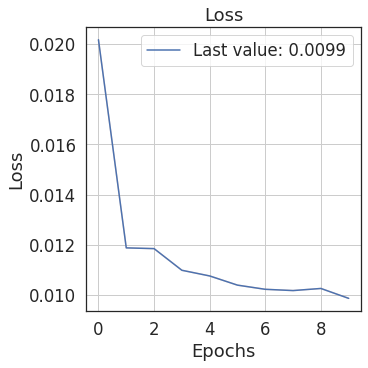

Train Score RMSE:  303.2580008002168
Test Score: RMSE:  1569.1587304155005


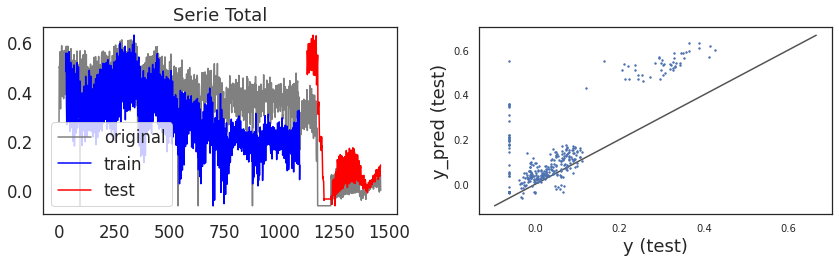

Epoch 1/10
1060/1060 - 3s - loss: 0.0524
Epoch 2/10
1060/1060 - 1s - loss: 0.0036
Epoch 3/10
1060/1060 - 1s - loss: 0.0028
Epoch 4/10
1060/1060 - 1s - loss: 0.0023
Epoch 5/10
1060/1060 - 1s - loss: 0.0020
Epoch 6/10
1060/1060 - 1s - loss: 0.0016
Epoch 7/10
1060/1060 - 1s - loss: 0.0015
Epoch 8/10
1060/1060 - 1s - loss: 0.0013
Epoch 9/10
1060/1060 - 1s - loss: 0.0012
Epoch 10/10
1060/1060 - 1s - loss: 0.0011


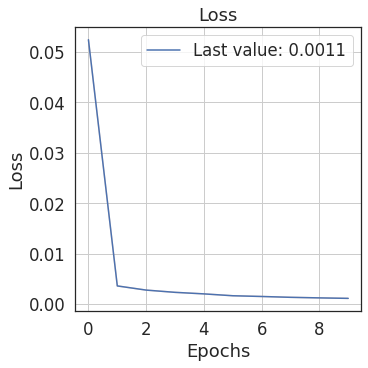

Train Score RMSE:  180.11808052970875
Test Score: RMSE:  2010.0114114162232


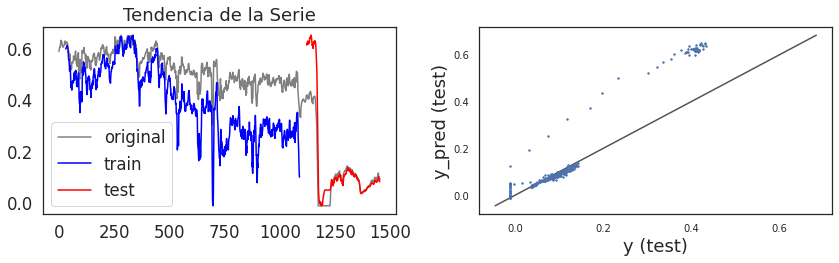

Epoch 1/10
1060/1060 - 3s - loss: 0.0334
Epoch 2/10
1060/1060 - 1s - loss: 0.0110
Epoch 3/10
1060/1060 - 1s - loss: 0.0101
Epoch 4/10
1060/1060 - 1s - loss: 0.0096
Epoch 5/10
1060/1060 - 1s - loss: 0.0092
Epoch 6/10
1060/1060 - 1s - loss: 0.0086
Epoch 7/10
1060/1060 - 1s - loss: 0.0084
Epoch 8/10
1060/1060 - 1s - loss: 0.0083
Epoch 9/10
1060/1060 - 1s - loss: 0.0082
Epoch 10/10
1060/1060 - 1s - loss: 0.0080


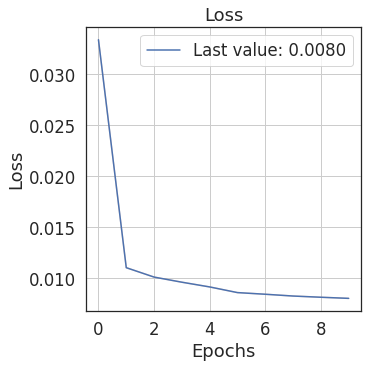

Train Score RMSE:  229.14707074543452
Test Score: RMSE:  53.141117042463804


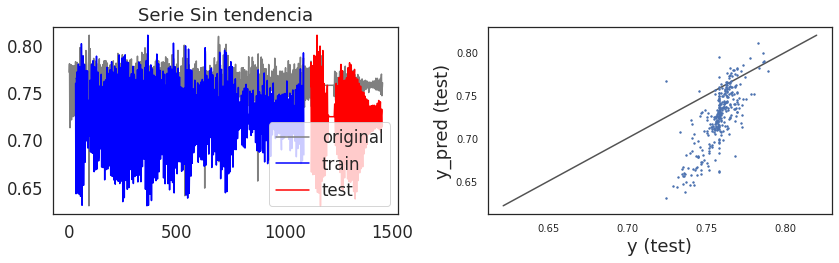

In [129]:

#defino dos procesos para hacer más corta la preparación del input para la NN y los resultados su output.
def inputNN(df,look_back):
  df = df.dropna()
  dataset = df.values
  dataset = dataset.astype("float32")

  # normalize the dataset
  scaler = MinMaxScaler()
  dataset = scaler.fit_transform(dataset.reshape(-1,1))
  # split into train and test sets
  train_size = int(len(dataset) * 0.75)
  test_size = len(dataset) - train_size #obtengo el 2020
  train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
  # reshape into X=t and Y=t+1
  look_back = look_back
  trainX, trainY = create_dataset(train, look_back)
  testX, testY = create_dataset(test, look_back)
  # reshape input to be [samples, time steps, features]
  trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
  testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
  return dataset,trainX,testX,trainY,testY


def NNresult(dataset,trainX,testX,trainY,testY,nameserie,model):
  scaler = MinMaxScaler()
  # make predictions
  trainPredict =scaler.fit_transform(model.predict(trainX))
  testPredict = scaler.fit_transform(model.predict(testX))

  # invert predictions
  trainPredict = scaler.inverse_transform(trainPredict)
  trainY = scaler.inverse_transform(trainY)
  testPredict = scaler.inverse_transform(testPredict)
  testY = scaler.inverse_transform(testY)

  # calculate root mean squared error
  trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[0,:]))
  print('Train Score RMSE: ', trainScore*10000) #se multiplica por el orden de magnitud de los datos porque con el escalado eso se "borra" y uno tiene que tener comparación entre las metricas de los modelos
  testScore = math.sqrt(mean_squared_error(testY[0,:], testPredict[0,:]))
  print('Test Score: RMSE: ',testScore*10000)

  # shift train predictions for plotting
  trainPredictPlot = numpy.empty_like(dataset)
  trainPredictPlot[:, :] = numpy.nan
  trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
  # shift test predictions for plotting
  testPredictPlot = numpy.empty_like(dataset)
  testPredictPlot[:, :] = numpy.nan
  testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

  fig=plt.figure(figsize = (12,4))
  plt.subplot(1,2,1)
  # plot baseline and predictions
  plt.plot(scaler.inverse_transform(dataset),label='original',c='grey')
  plt.plot(np.flip(trainPredictPlot,axis=1),label='train',c='blue')
  plt.plot(np.flip(testPredictPlot,axis=1),label='test',c='red')
  plt.legend(loc='bestloc')
  plt.title(str(nameserie))

  ### GRAFICAMOS la de dispersión de y_test vs y_predic_test y el histograma de distribución de errores(generados por el modelo a partir de los datos dev)
  #Si el modelo de regresión es bueno, cerca de que curva deberían estar los puntos. indicando un buen ajuste.

  ax = plt.subplot(1,2,2)
  ax.scatter(testY,testPredict, s =2)
    
  lims = [
  np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
  np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
  ]

  ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
  plt.xlabel('y (test)')
  plt.ylabel('y_pred (test)')

  plt.xticks(fontsize=10)
  plt.yticks(fontsize=10)
  fig.patch.set_facecolor('xkcd:white')
  plt.tight_layout()
  plt.show()

####################################################################
#Serie total
df = X_tot
look_back = 30
epochs=10
nameserie='Serie Total'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network. MODELO NN 1 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 neuronas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
#lossfun(history)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)

###########################
#Tendencia de la serie

df = X_t
look_back = 30
epochs=10
nameserie='Tendencia de la Serie'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network. MODELO NN 1 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 neuronas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)



###########################
#Serie sin tendencia

df = X_wOt
look_back = 30
epochs=10
nameserie='Serie Sin tendencia'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network.
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) #4 neuronas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)

* Red neuronal más compleja

Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_113 (LSTM)              (None, 15)                2760      
_________________________________________________________________
flatten_46 (Flatten)         (None, 15)                0         
_________________________________________________________________
dense_190 (Dense)            (None, 128)               2048      
_________________________________________________________________
dense_191 (Dense)            (None, 1)                 129       
Total params: 4,937
Trainable params: 4,937
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1064/1064 - 3s - loss: 0.0143
Epoch 2/10
1064/1064 - 1s - loss: 0.0122
Epoch 3/10
1064/1064 - 1s - loss: 0.0108
Epoch 4/10
1064/1064 - 1s - loss: 0.0106
Epoch 5/10
1064/1064 - 1s - loss: 0.0104
Epoch 6/10
1064/1064 - 1s - loss: 0.0100
Ep

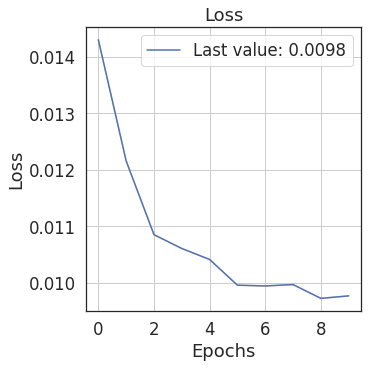

Train Score RMSE:  241.97578261037938
Test Score: RMSE:  21.122098162483912


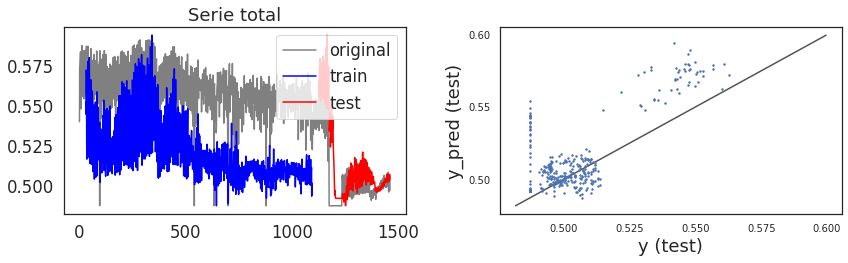

Epoch 1/10
1060/1060 - 3s - loss: 0.0068
Epoch 2/10
1060/1060 - 1s - loss: 0.0036
Epoch 3/10
1060/1060 - 1s - loss: 0.0025
Epoch 4/10
1060/1060 - 1s - loss: 0.0022
Epoch 5/10
1060/1060 - 1s - loss: 0.0020
Epoch 6/10
1060/1060 - 1s - loss: 0.0018
Epoch 7/10
1060/1060 - 1s - loss: 0.0017
Epoch 8/10
1060/1060 - 1s - loss: 0.0015
Epoch 9/10
1060/1060 - 1s - loss: 0.0015
Epoch 10/10
1060/1060 - 1s - loss: 0.0014


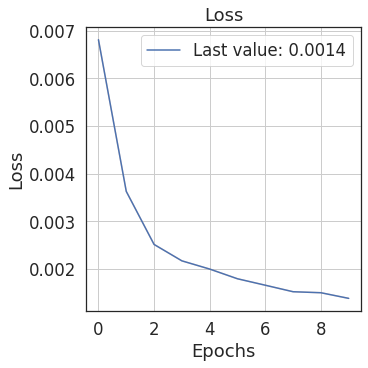

Train Score RMSE:  65.00720960294859
Test Score: RMSE:  560.2985581385734


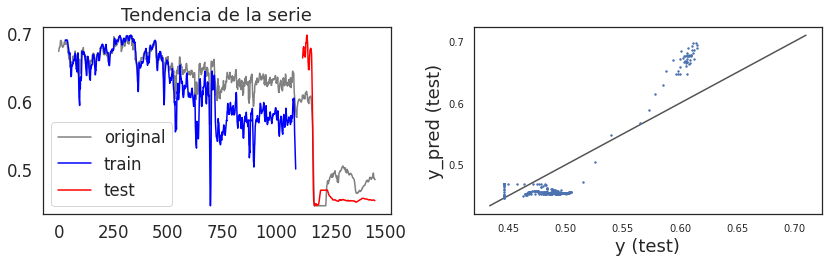

Epoch 1/10
1060/1060 - 3s - loss: 0.0116
Epoch 2/10
1060/1060 - 1s - loss: 0.0096
Epoch 3/10
1060/1060 - 1s - loss: 0.0091
Epoch 4/10
1060/1060 - 1s - loss: 0.0085
Epoch 5/10
1060/1060 - 1s - loss: 0.0084
Epoch 6/10
1060/1060 - 1s - loss: 0.0083
Epoch 7/10
1060/1060 - 1s - loss: 0.0079
Epoch 8/10
1060/1060 - 1s - loss: 0.0079
Epoch 9/10
1060/1060 - 1s - loss: 0.0079
Epoch 10/10
1060/1060 - 1s - loss: 0.0077


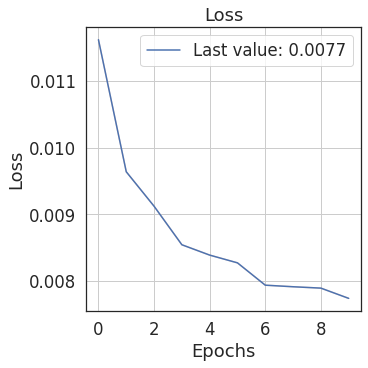

Train Score RMSE:  64.79024952885857
Test Score: RMSE:  95.03066684630963


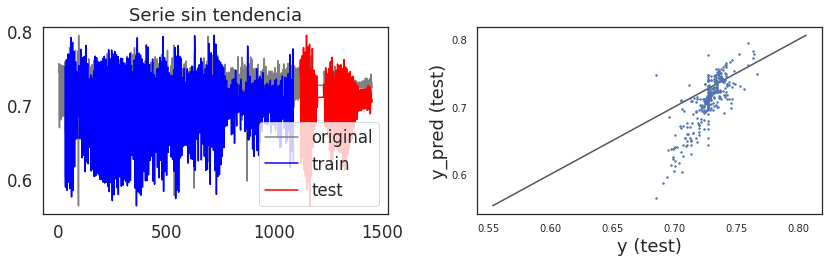

In [130]:
#######################################################
from keras.optimizers import RMSprop

df = X_tot

look_back = 30
epochs=10
nameserie='Serie total'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network. MODELO NN 2 
# se introducen más neuronas al LSTM, una capa flatten, otra droput y 3 densas con distintas neuronas. 
model = Sequential()
model.add(LSTM(15, input_shape=(1, look_back))) #15 neuronas
model.add(Flatten() ) #el flaten es como un reshape, donde va concatenando las filas entre sí "horizontalmente" 
model.add(Dense(128, activation= 'relu'))#le agrego un layer denso (fully conected layer)
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(loss='mean_squared_error',optimizer=RMSprop(lr=0.001)) #la funcion de costo se hace bach a bach, la funcion loss es una funcion intermedia y la metrica es al final
#optimizer calcula un gradiente por desenso de la funcion de costo

history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)

###########################################
df = X_t
look_back = 30
epochs=10
nameserie='Tendencia de la serie'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network. MODELO NN 1 
model = Sequential()
model.add(LSTM(15, input_shape=(1, look_back))) #15 neuronas
model.add(Flatten() ) #el flaten es como un reshape, donde va concatenando las filas entre sí "horizontalmente" 
model.add(Dense(128, activation= 'relu'))#le agrego un layer denso (fully conected layer)
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.001))
history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)

##################################
df = X_wOt
look_back = 30
epochs=10
nameserie='Serie sin tendencia'
dataset,trainX,testX,trainY,testY=inputNN(df,look_back)

# create and fit the LSTM network. MODELO NN 1 
model = Sequential()
model.add(LSTM(15, input_shape=(1, look_back))) #15 neuronas
model.add(Flatten() ) #el flaten es como un reshape, donde va concatenando las filas entre sí "horizontalmente" 
model.add(Dense(128, activation= 'relu'))#le agrego un layer denso (fully conected layer)
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.001))
history=model.fit(trainX, trainY, epochs=epochs, batch_size=1, verbose=2)
plot_history(history)
plt.show()
#show results
NNresult(dataset,trainX,testX,trainY,testY,nameserie,model)
#Grafico el modelo


* Comparación de métricas de desempeño de las Redes

Se observó que tanto para la red neuronal sencilla como la más compleja la serie total y la tendencia de la serie pudieron percibir el cambio extremo aunque no de forma tan precisa (algún desfasaje temporal o con despunte sin justificación luego de la caida). Además en términos generales se observa una sobreestimación del modelo vs los datos originales, esto se nota mayormente en los primeros trimestres y luego los datos tienden a acercarse más a la realidad, pero no alcanzan.
En cuanto a la serie sin tendencia fue la más “problemática” en este caso ya que la modulación no de la serie no fue acorde a la realidad, generando mucha subestimación de los datos por parte del modelo (esto es probable a alguna transformación del modelo que desfazó en el eje y las series, mas no he podido ubicar el problema).

En términos del error para todas las series el error fueron tolerables en ambos casos con órdenes de magnitud de 3 o 4. En este sentido se observa un potencial en las redes neuronales y en principio bajo un armado simple de LSTM generaría una ventaja para estimar la serie, siempre y cuando se considere a la tendencia en la serie ya que es un factor modulante principal en esta serie particular.

--------------------



* Comparación de métricas de desempeño con los modelos y benchmark (comparación final)

A continuación presento un gráfico del RMSE de todos los modelos,incluido el benchmark, para nalizar el desempeño en los datos Test obtenidos.


Text(0.5, 1.0, 'Performance en Test de los Modelos')

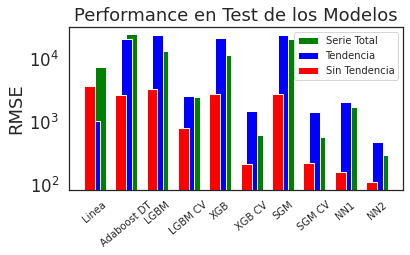

In [128]:
Resultfinal = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Proyecto_4/Metricas_proy_4-Hoja 2.csv', decimal=",")
Resultfinal.Total
labels=['Linea','Adaboost DT','LGBM','LGBM CV','XGB','XGB CV','SGM','SGM CV','NN1','NN2']

#Serie Total
x = np.arange(len(labels))
width = 0.35  # the width of the bars

fig, axs = plt.subplots(1,figsize=(6,3))
fig.patch.set_facecolor('xkcd:white')

rects1 = axs.bar(x + width/2, Resultfinal.Total.values, width,color='green',label='Serie Total')
rects2 = axs.bar(x, Resultfinal.Tendencia.values, width,color='blue',label='Tendencia')
rects3 = axs.bar(x - width/2, Resultfinal['Sin tendencia'].values, width,color='red',label='Sin Tendencia')
# Add some text for labels, title and custom x-axis tick labels, etc.
axs.set_ylabel('RMSE')
axs.set_xticks(x)
axs.set_xticklabels(labels)
axs.legend(fontsize='10')
axs.set_xticks(x)
plt.yscale('log')
axs.set_xticklabels(labels, rotation=40,fontsize=10)
plt.title('Performance en Test de los Modelos')


Conforme a lo analizado previamente y habiendo obtenido los resultados de cada modelo. Se observa que para los modelos con implementación de CV y las redes neuronales, se tuvo un rendimiento bueno. Aún así hay que tener en cuenta que la performance puede estar sobreajustando y no necesariamente sea coherente con lo que se queire buscar.
Como se pudo ver a lo largo de este proyecto las técnicas de modelos avanzados no tuvieron una performance para mejorar al benchmark lineal, pero sí se ha visto una gran mejora al implementar la cross validation para series de tiempo. Esto es un paso ser tomado como recomendable a la hora de hacer mejoras a los modelos en este tipo de datos.
Por último, las redes neuronales permitieron una mejoría para la predicción, lo cual hace que sea una buena herramienta para casos en donde se tengan fenómenos externos extremos. Sin embargo,dada su complejidad es posible que haya que seguir indagando. Si bien la complejización demostró una mejora en la performance no quiere decir que los resultados sean coherentes, como se observó en los gráficos de dispersión, ya que se estarían sobre/sub estimando valores por una mala estructura de la red.


Aún así las redes LSTM tienen mucho que ofrecer, tanto es así que uno encuentra muchas formas de tratar las series con ellas (Por ejemplo [LSTM - Recetas de una red para TS](https://unipython.com/prediccion-con-series-temporales-con-lstm-redes-neuronales-recurrentes/) ó [Rectas 2](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)ó [Recetas 3](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)).
Otro condimento que podría posibilitar la mejora de la red es atravéz de optimizar hiperparámetros (número de batch, funciones de pérdida que mejor se adapten al problema, la cantidad de capas o nodos, cantidad de epocas, el optimizador, la misma arquitectura).


----------
-----------------



##Parte D: Conclusiones Finales


Apartir de lo analizado en este proyecto, las series de tiempo que presentan cambios drásticos en su comportamiento (ya sea por factor interno u externo) demuestran un desafío y complejidad mayor a la hora de saber tratar los datos (como considerar los outliers en el EDA) como así también modelarlos.

Se observa que no siempre es conveniente predecir una serie de tiempo con muchos datos previos para entender un futuro a mayor plazo. Aveces avanzar con pequeños pasos logra un mejor rendimiento que hacerlo con grandes pasos temporales. Los nuevos modelos generados permitieron mejoras respecto al benchmark.

Por otro lado, la utlización de un modelo de Red Neuronal, mejoró el rendimiento del modelo benchmark tanto en Train como en Test. Aún así no se descarta que deba seguir mejorando y entender cómo las estructuras de las redes procesan la información para tratar mejor los datos.

A modo de resumen final, la combinación de modelos avanzados con Cross validación resultó en una mejora al modelo planteado en el proyecto 3 (llamado hasta ahora modelo benchmark). Por otra parte el tratamiento con redes neuronales y su optimización es un mundo amplio para recorrer y dada la complejidad y formas de una red neuronal uno puede encontrar diversas recetas, especialmente para las series temporales, que ayuden a predecir mejor los cambios. Para futuro se piensa seguir probando en el mundo de [tensorflow](https://www.tensorflow.org/resources/learn-ml/theoretical-and-advanced-machine-learning?hl=es-419) ó la librería [pytorch](
https://stackabuse.com/time-series-prediction-using-lstm-with-pytorch-in-python/
) ([+extra](https://curiousily.com/posts/time-series-forecasting-with-lstm-for-daily-coronavirus-cases/) ) que también ofrece posibilidades en este campo.


